# Imports

In [1126]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import TumorDecon as td
from scipy.stats import wilcoxon
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree._tree import TREE_LEAF
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
from scipy import stats
from sklearn.tree import _tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.tree._tree import TREE_LEAF
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
from scipy import stats
from sklearn.tree import _tree
from itertools import combinations
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from collections import Counter
from itertools import combinations 
from statsmodels.stats.proportion import proportions_ztest
from sklearn.tree import DecisionTreeClassifier
from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,median_absolute_error
from sklearn.svm import SVC,SVR
from sklearn.ensemble import *

# Format Data

In [10]:
gene_expression = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_data/HiSeqV2.txt',index_col="Hugo_Symbol",delimiter='\t')
gene_expression = 2**gene_expression-1
gene_expression = td.df_normalization(gene_expression, "minmax").T
gene_expression.head()

Hugo_Symbol,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-VD-A8KM-01,0.003596,0.000032,0.000000,0.016569,0.005604,0.003554,0.015813,0.000266,0.000000,0.000133,...,0.000001,0.000001,0.000180,0.000000,0.003001,0.011987,0.000569,0.010163,0.000242,0.004867
TCGA-V4-A9F4-01,0.004061,0.003060,0.000002,0.013544,0.008972,0.003390,0.018184,0.000073,0.000004,0.000035,...,0.000000,0.000000,0.000020,0.000000,0.009478,0.039346,0.000191,0.007846,0.000207,0.002073
TCGA-WC-A881-01,0.001916,0.000291,0.000000,0.011970,0.001711,0.003790,0.016710,0.000042,0.000000,0.000048,...,0.000000,0.000000,0.000048,0.000000,0.003915,0.030447,0.000199,0.007411,0.000050,0.002025
TCGA-V4-A9F1-01,0.006234,0.000047,0.000000,0.028288,0.015162,0.006344,0.033979,0.000130,0.000000,0.000162,...,0.000000,0.000000,0.000132,0.000022,0.008496,0.027796,0.000577,0.021915,0.000442,0.008476
TCGA-VD-AA8N-01,0.001705,0.000193,0.000000,0.018092,0.003351,0.001419,0.015401,0.000127,0.000000,0.000226,...,0.000000,0.000000,0.000080,0.000013,0.004803,0.021589,0.000766,0.019165,0.000040,0.002198


In [11]:
presence_df = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_Data/Gistic2_CopyNumber_Gistic2_all_thresholded.txt',delimiter='\t', index_col="Hugo_Symbol").T
presence_df.head()

Hugo_Symbol,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-RZ-AB0B-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
TCGA-V3-A9ZX-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-V3-A9ZY-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-V4-A9E5-01,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
TCGA-V4-A9E7-01,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [15]:
immune_fractions_df_uncombined = td.cibersort_main(gene_expression.T,td.read_lm22_file(td.get_td_Home()+'data/LM22.txt'))
immune_fractions_df_uncombined.head()

Running CiberSort...


Patient_ID,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
TCGA-VD-A8KM-01,0.024966,0.050711,0.033906,0.187695,0.0,0.000000,0.0,0.044672,0.088652,0.000000,...,0.040162,0.199266,0.128006,0.091214,0.000000,0.0,0.053607,0.0,0.000000,0.0
TCGA-V4-A9F4-01,0.007994,0.004676,0.000000,0.000000,0.0,0.209997,0.0,0.000220,0.019691,0.000000,...,0.045802,0.193142,0.003571,0.041033,0.008250,0.0,0.343522,0.0,0.018095,0.0
TCGA-WC-A881-01,0.000293,0.016051,0.002660,0.000000,0.0,0.163315,0.0,0.020665,0.021583,0.000000,...,0.062214,0.217759,0.027151,0.094747,0.007622,0.0,0.271397,0.0,0.000000,0.0
TCGA-V4-A9F1-01,0.007302,0.000568,0.014095,0.014327,0.0,0.143637,0.0,0.006160,0.015152,0.000000,...,0.046666,0.168841,0.019495,0.266765,0.001986,0.0,0.221395,0.0,0.003405,0.0
TCGA-VD-AA8N-01,0.001909,0.000000,0.008393,0.053386,0.0,0.000000,0.0,0.049877,0.040133,0.031024,...,0.035761,0.057318,0.162823,0.252976,0.014334,0.0,0.253272,0.0,0.000000,0.0


In [16]:
immune_fractions_df = td.combine_celltypes(immune_fractions_df_uncombined)
immune_fractions_df.head()

Patient_ID,Plasma cells,CD8 T cells,T cells gamma delta,Monocytes,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC
TCGA-VD-A8KM-01,0.033906,0.187695,0.000000,0.040162,0.000000,0.0,0.075677,0.133324,0.057144,0.418486,0.053607,0.000000
TCGA-V4-A9F4-01,0.000000,0.000000,0.000000,0.045802,0.018095,0.0,0.012670,0.229908,0.104007,0.237746,0.343522,0.008250
TCGA-WC-A881-01,0.002660,0.000000,0.000000,0.062214,0.000000,0.0,0.016344,0.205562,0.094546,0.339656,0.271397,0.007622
TCGA-V4-A9F1-01,0.014095,0.014327,0.000000,0.046666,0.003405,0.0,0.007869,0.164948,0.070208,0.455101,0.221395,0.001986
TCGA-VD-AA8N-01,0.008393,0.053386,0.031024,0.035761,0.000000,0.0,0.001909,0.090010,0.038793,0.473118,0.253272,0.014334


In [31]:
survival_df = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_Data/UVM_survival.txt',delimiter='\t')
del survival_df['DFI']
del survival_df['DFI.time']
del survival_df['Redaction']
survival_df.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,PFI,PFI.time
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,1,149,1,149,0,149.0
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,0,470,0,470,1,233.0
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,0,459,0,459,0,459.0
TCGA-V4-A9E5-01,TCGA-V4-A9E5,0,2499,0,2499,0,2499.0
TCGA-V4-A9E7-01,TCGA-V4-A9E7,1,415,1,415,1,35.0


In [26]:
phenotype_df = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_Data/UVM_clinicalMatrix.txt',delimiter='\t',index_col="sampleID")
phenotype_df.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_UVM_mutation_bcm_gene,_GENOMIC_ID_TCGA_UVM_hMethyl450,_GENOMIC_ID_TCGA_UVM_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_UVM_mutation_broad_gene,_GENOMIC_ID_TCGA_UVM_RPPA,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_UVM_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_UVM_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/UVM/miRNA_HiSeq_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39X-05,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39W-08,NaN,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39X-05,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39W-08,9A2C60AE-C0F6-4AFF-B7A2-517D8CD8FFBF,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39X-05,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39W-08,NaN,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39X-05,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39W-08,NaN,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01,TCGA-V4-A9E5-01
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39X-05,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39W-08,NaN,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01,TCGA-V4-A9E7-01


In [27]:
patient_dict = {}

In [547]:
for patient_id in list(gene_expression.index):
    patient_dict[patient_id] = {}
    patient_dict[patient_id]['BAP1_mutation'] = presence_df.loc[patient_id,'BAP1']
    patient_dict[patient_id]['DSS_time'] = survival_df.loc[patient_id,'DSS.time']
    patient_dict[patient_id]['os_status'] = survival_df.loc[patient_id,'DSS']
    patient_dict[patient_id]['PFI_time'] = survival_df.loc[patient_id,'PFI.time']
    if patient_id in list(phenotype_df.index):
        patient_dict[patient_id]['tumor_diameter'] = phenotype_df.loc[patient_id,'tumor_basal_diameter']
    else:
        patient_dict[patient_id]['tumor_diameter'] = np.nan
    if patient_id in list(phenotype_df.index):
        patient_dict[patient_id]['weight'] = phenotype_df.loc[patient_id,'weight']
    else:
        patient_dict[patient_id]['weight'] = np.nan
    if patient_id in list(phenotype_df.index):
        patient_dict[patient_id]['age'] = phenotype_df.loc[patient_id,'age_at_initial_pathologic_diagnosis']
    else:
        patient_dict[patient_id]['age'] = np.nan
    if patient_id in list(phenotype_df.index):
        if np.isnan(phenotype_df.loc[patient_id,"tumor_thickness"]):
            patient_dict[patient_id]["tumor_thickness"] = np.nan
        else:
            patient_dict[patient_id]["tumor_thickness"] = phenotype_df.loc[patient_id,"tumor_thickness"]
    else:
        patient_dict[patient_id]["tumor_thickness"] = np.nan
    if patient_id in list(phenotype_df.index):
        s = phenotype_df.loc[patient_id,"clinical_stage"]
        if s == "Stage IV":
            patient_dict[patient_id]['stage'] = 2
        elif s == 'Stage IIIB' or s == 'Stage IIIC' or s == "Stage IIIA":
            patient_dict[patient_id]['stage'] = 1
        elif s == 'Stage IIA' or s == "Stage IIB":
            patient_dict[patient_id]['stage'] = 0
        else:
            patient_dict[patient_id]['stage'] = np.nan
    else:
        patient_dict[patient_id]['stage'] = np.nan
    if phenotype_df.loc[patient_id,"clinical_M"] == 'M0':
        patient_dict[patient_id]['M'] = 0
    elif phenotype_df.loc[patient_id,"clinical_M"] == 'MX':
        patient_dict[patient_id]['M'] = 2
    else:
        patient_dict[patient_id]['M'] = 1

    if phenotype_df.loc[patient_id,"clinical_N"] == 'N0':
        patient_dict[patient_id]['N'] = 0
    elif phenotype_df.loc[patient_id,"clinical_N"] == 'NX':
        patient_dict[patient_id]['N'] = 1
        
    if type(phenotype_df.loc[patient_id,"clinical_T"]) == type("sd"):
        if phenotype_df.loc[patient_id,"clinical_T"][:2] == 'T2':
            patient_dict[patient_id]['T'] = 0
        elif phenotype_df.loc[patient_id,"clinical_T"][:2] == 'T3':
            patient_dict[patient_id]['T'] = 1
        elif phenotype_df.loc[patient_id,"clinical_T"][:2] == 'T4':
            patient_dict[patient_id]['T'] = 2
    else:
        patient_dict[patient_id]['T'] = np.nan
        
    if phenotype_df.loc[patient_id,"gender"] == 'FEMALE':
        patient_dict[patient_id]['gender'] = 1
    else:
        patient_dict[patient_id]['gender'] = 0

# See if the PCA vectors correlate well with the top 10 most variant genes in the set

In [167]:
most_variant = td.variance_threshold_selector(gene_expression.T, threshold=0.0005).T
most_variant= most_variant.T.assign(a=most_variant.var(axis=0)).sort_values('a').drop('a', axis=1).T
most_variant.head()

Hugo_Symbol,C19orf28,DDX17,GPR143,GNAT1,TRAM1,GANAB,RPSAP58,EIF3A,RPL24,CYC1,...,PABPC1,SILV,GAPDH,RPL8,EEF2,HLA-A,VIM,HLA-B,TYRP1,EEF1A1
TCGA-VD-A8KM-01,0.032161,0.018774,0.026563,0.000001,0.014366,0.028185,0.014572,0.021984,0.012943,0.015251,...,0.157037,0.582769,0.162868,0.156635,0.200877,0.407902,0.143854,0.550455,1.000000,0.231564
TCGA-V4-A9F4-01,0.020800,0.034849,0.011388,0.000004,0.015495,0.042118,0.069841,0.044628,0.067575,0.016677,...,0.436996,0.883621,0.185730,0.701929,0.883315,0.057273,1.000000,0.011573,0.479497,0.902438
TCGA-WC-A881-01,0.021818,0.039053,0.017084,0.000006,0.006700,0.025723,0.082994,0.019261,0.094788,0.016424,...,0.463292,0.996471,0.299264,1.000000,0.558797,0.043156,0.733667,0.017883,0.433527,0.538454
TCGA-V4-A9F1-01,0.057533,0.042493,0.076023,0.000040,0.058352,0.076828,0.032345,0.067091,0.025342,0.082606,...,0.570735,1.000000,0.843113,0.634633,0.668961,0.228231,0.549843,0.120811,0.867718,0.678394
TCGA-VD-AA8N-01,0.031488,0.013070,0.054045,0.000120,0.011211,0.060046,0.031396,0.019459,0.034854,0.052193,...,0.216087,0.954489,1.000000,0.716778,0.906890,0.254350,0.811126,0.180088,0.796143,0.264270


In [152]:
pca = PCA(n_components=6)
pca_expression = pca.fit_transform(gene_expression.values)
print(sum(pca.explained_variance_ratio_))

0.8000980930524445


In [ ]:
np.mean([stats.pearsonr(pca_expression[i,:10],most_variant.iloc[i,:6].values)[0] for i in range(80)])

## Perform Analysis Based off of Most Variant Genes
Instead of finding high entropy genes, find the most variant genes in each of the subgroups determined by K-means.

### Helper Functions

In [56]:
def SSE(points, labels, centers):
    total_error = 0
    data_mean = np.mean(points) 
    for i in range(len(points)):
        total_error += sum((points[i]-data_mean)**2)
    return total_error

def SSE_bet(points, labels, centers):
    total_error = 0
    data_mean = np.mean(points) 
    
    for k in range(len(centers)):
        n = sum([1 for l in labels if l == k])
        total_error += n*(sum((centers[k]-data_mean)**2))
    return total_error

def cluster_gene_variance(expression_df, pca_components=30, n_clusters=3,variance_threshold=.2):
    pca = PCA(n_components=pca_components)
    transormed_values = pca.fit_transform(expression_df.values)
    print("Tot Explained Var (PCA): ", sum(pca.explained_variance_ratio_))
    km= KMeans(n_clusters=n_clusters,n_init=5,random_state=42)
    labels = km.fit_predict(transormed_values)
    print("Frac Var Exp (k-menas): ",SSE_bet(transormed_values,labels,km.cluster_centers_)/SSE(transormed_values,labels,km.cluster_centers_))
    print(Counter(labels))
    group_dataframes = [pd.DataFrame(columns=expression_df.columns) for i in range(len(km.cluster_centers_))]
    
    for i in range(len(labels)):
        group_dataframes[labels[i]].loc[list(expression_df.index)[i]]=expression_df.iloc[i]
    
    for i in range(len(km.cluster_centers_)):
        group_dataframes[i]  = td.variance_threshold_selector(group_dataframes[i].T, threshold=variance_threshold).T
        group_dataframes[i].T.assign(a=group_dataframes[i].var(axis=0)).sort_values('a').drop('a', axis=1).T
    return group_dataframes

## Clustering 

In [57]:
group_dataframes = cluster_gene_variance(gene_expression,variance_threshold=.03,pca_components=6)

Tot Explained Var (PCA):  0.8000980930524443
Frac Var Exp (k-menas):  0.5521134053305433
Counter({1: 34, 2: 32, 0: 14})


In [58]:
group_dataframes[0].shape,group_dataframes[1].shape,group_dataframes[2].shape

((14, 13), (34, 3), (32, 7))

## Differences in Immune Response

In [60]:
grouped_ids = [list(group_dataframes[i].index) for i in range(len(group_dataframes))]

In [62]:
def cell_frequency_boxplot(sample_cell_freq, title,xsize=12, ysize=7):
    """
     Input:
        - 'sample_cell_freq': A dataframe that include cell frequency of samples
            Rows are samples id, columns are cell names
    Output:
        - cells frequency box plot in descending order
    """
    new_cell_freq = td.combine_celltypes(sample_cell_freq)
    b=new_cell_freq.median(axis = 0)
    b=list(zip(b.index,b))
    b = sorted(b, key=lambda x: x[-1],reverse=True)
    sorted_cells=[x[0] for x in b]
    new_cell_freq=new_cell_freq[sorted_cells]
    sns.set(rc={'figure.figsize':(xsize,ysize)})
    sns.set(style="white")
    palette={'Macrophages':'violet','CD8 T cells':'orange','CD4 T cells':'goldenrod','Monocytes':'lightsalmon','NK cells':'olivedrab','Mast cells':'red','B cells':'darkcyan','T cells gamma delta':'dodgerblue','DC':'gray','Plasma cells':'seagreen','Neutrophils':'navy', 'Eosinophils':'purple'}
    sns.boxplot(order=sorted_cells, data=new_cell_freq,palette=palette)
    sns.swarmplot(order=sorted_cells, data=new_cell_freq,color=".25")
    plt.xlabel('')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Frequencey')
    plt.subplots_adjust(top=0.95,bottom=0.2)
    plt.show()
    return plt

### Expression Groups Analysis

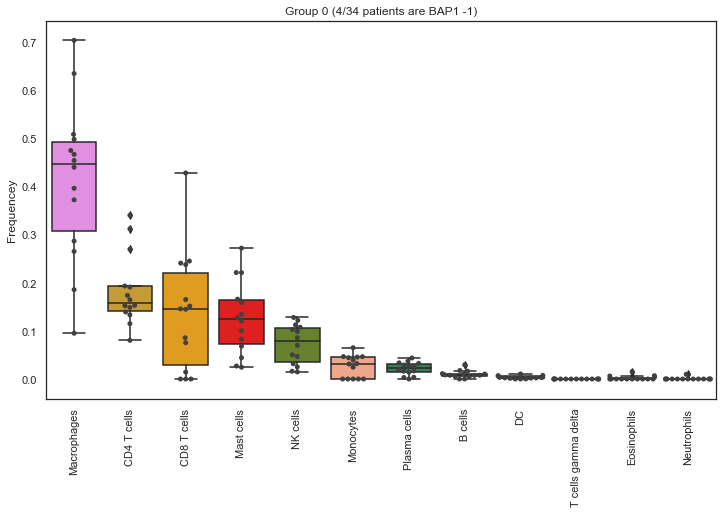

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [63]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[grouped_ids[0]], "Group 0 (4/34 patients are BAP1 -1)")

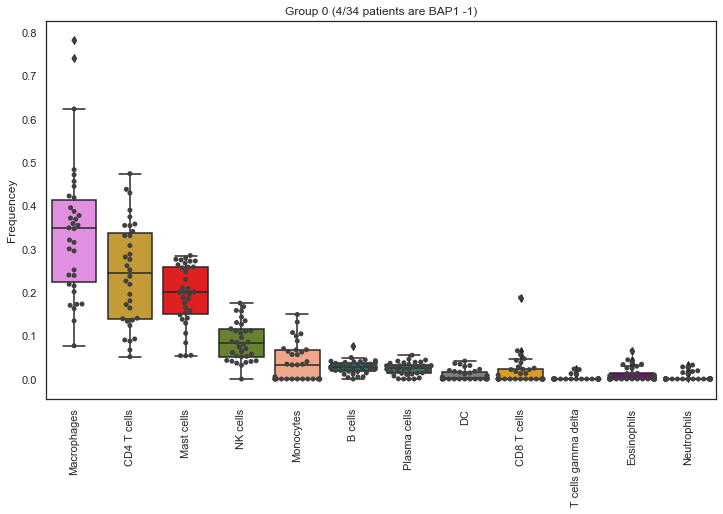

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [64]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[grouped_ids[1]], "Group 0 (4/34 patients are BAP1 -1)")

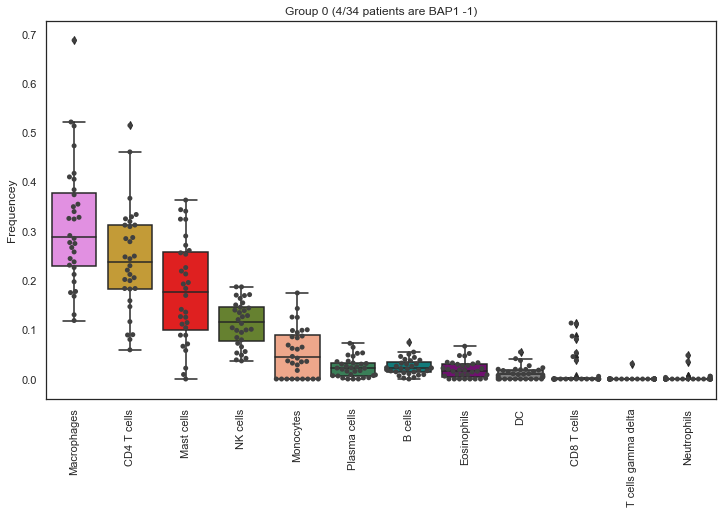

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [65]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[grouped_ids[2]], "Group 0 (4/34 patients are BAP1 -1)")

In [422]:
def print_significant_immune_differences(immune_fractions, grouped_ids):
    ## Test every immune cell against every group and print and return it if significant
    immune_cell_types = list(immune_fractions.columns)
    for i in range(len(immune_fractions.columns)):
        for c in combinations(list(range(len(grouped_ids))),2):
            if set(immune_fractions.loc[grouped_ids[c[0]],immune_cell_types[i]].values) != set(immune_fractions.loc[grouped_ids[c[1]],immune_cell_types[i]].values):
                mw_result = mannwhitneyu(immune_fractions.loc[grouped_ids[c[0]],immune_cell_types[i]].values,immune_fractions.loc[grouped_ids[c[1]],immune_cell_types[i]].values)
                if mw_result[1] < .05:
                    print(immune_cell_types[i]," difference between groups ",c[0]," ",c[1]," p-value: ", mw_result[1])
                    
print_significant_immune_differences(immune_fractions_df,grouped_ids)

CD8 T cells  difference between groups  0   1  p-value:  0.0002476602261807433
CD8 T cells  difference between groups  0   2  p-value:  3.2302924114901535e-05
Monocytes  difference between groups  0   2  p-value:  0.04981864073009022
Eosinophils  difference between groups  0   2  p-value:  0.00013747705787189393
Eosinophils  difference between groups  1   2  p-value:  0.004726407515110329
B cells  difference between groups  0   1  p-value:  8.689744952821204e-05
B cells  difference between groups  0   2  p-value:  0.0005137075539582791
CD4 T cells  difference between groups  0   2  p-value:  0.02444768208795753
NK cells  difference between groups  0   2  p-value:  0.0051391678076250355
NK cells  difference between groups  1   2  p-value:  0.012581294123348024
Macrophages  difference between groups  0   1  p-value:  0.035674384648201295
Macrophages  difference between groups  0   2  p-value:  0.01536756970000732
Mast cells  difference between groups  0   1  p-value:  0.0041148206013324


In [423]:
print("Percentage of total BAP1 -1 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/44 for i in range(len(grouped_ids))])
print("Percentage of total BAP1 0 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/36 for i in range(len(grouped_ids))])
print("Percentage of BAP1 -1 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/len(grouped_ids[i]) for i in range(len(grouped_ids))])
print("Percentage of BAP1 0 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/len(grouped_ids[i]) for i in range(len(grouped_ids))])

Percentage of total BAP1 -1 by cluster:  [0.3181818181818182, 0.36363636363636365, 0.3181818181818182]
Percentage of total BAP1 0 by cluster:  [0.0, 0.5, 0.5]
Percentage of BAP1 -1 by cluster:  [1.0, 0.47058823529411764, 0.4375]
Percentage of BAP1 0 by cluster:  [0.0, 0.5294117647058824, 0.5625]


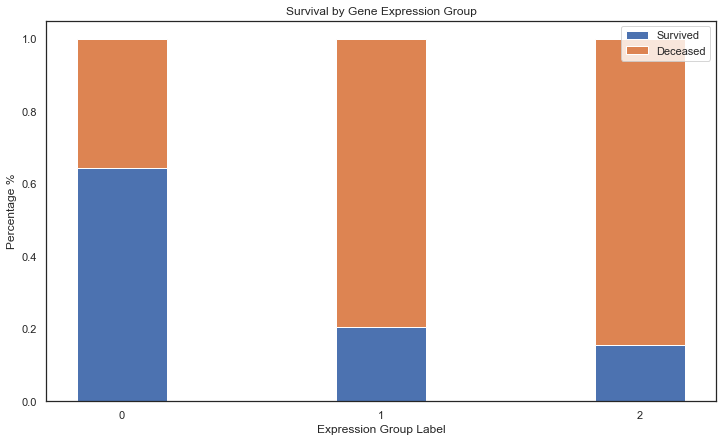

0 1 (2.9190766354039672, 0.003510699050842143)
0 2 (3.300330215002921, 0.0009657112681951391)
1 2 (0.5224729095144268, 0.6013411036605583)


In [548]:
N = 3
living_group= [sum([1 for p in grouped_ids[i] if patient_dict[p]['os_status'] == 1])/len(grouped_ids[i]) for  i in range(N)]
dead_group = [sum([1 for p in grouped_ids[i] if patient_dict[p]['os_status'] == 0])/len(grouped_ids[i]) for  i in range(N)]
v = [living_group,dead_group]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('Expression Group Label')
plt.title('Survival by Gene Expression Group')

plt.xticks(ind, ('0', '1','2'))
plt.legend(loc='best')
plt.show()
for c in combinations(range(N),2):
    print(c[0],c[1],proportions_ztest([sum([1 for p in grouped_ids[c[0]] if patient_dict[p]['os_status'] == 1]),sum([1 for p in grouped_ids[c[1]] if patient_dict[p]['os_status'] == 1])],[len(grouped_ids[c[0]]),len(grouped_ids[c[1]])]))

### BAP1 Groups Analysis

In [549]:
bap1_grouped_ids = [[],[]]
for p in list(patient_dict.keys()):
    if patient_dict[p]['BAP1_mutation'] == -1:
        bap1_grouped_ids[1].append(p)
    else:
        bap1_grouped_ids[0].append(p)
print_significant_immune_differences(immune_fractions_df,bap1_grouped_ids)

CD8 T cells  difference between groups  0   1  p-value:  0.00027535644116621975
Monocytes  difference between groups  0   1  p-value:  0.007911008312463533
Eosinophils  difference between groups  0   1  p-value:  0.030634448044689143
B cells  difference between groups  0   1  p-value:  0.034145127411382696
CD4 T cells  difference between groups  0   1  p-value:  0.00010020775928581038
NK cells  difference between groups  0   1  p-value:  0.016484882575862253
Macrophages  difference between groups  0   1  p-value:  0.00037538175596295314
DC  difference between groups  0   1  p-value:  0.007948980537117336


In [632]:
print_significant_phenotype_differences(bap1_grouped_ids)

BAP1_mutation  difference between groups  0   1  p-value:  3.266268206102596e-19
DSS_time  difference between groups  0   1  p-value:  0.03960457447302679
PFI_time  difference between groups  0   1  p-value:  0.006295071664032272
tumor_diameter  difference between groups  0   1  p-value:  0.045464145978725425
stage  difference between groups  0   1  p-value:  0.002294464302658786
M  difference between groups  0   1  p-value:  0.048656988910938004
T  difference between groups  0   1  p-value:  0.007213925287155189


In [551]:
print_significant_phenotype_differences(grouped_ids)

BAP1_mutation  difference between groups  0   1  p-value:  0.00034429571190223654
BAP1_mutation  difference between groups  0   2  p-value:  0.0001974677969144362
stage  difference between groups  0   1  p-value:  0.041025995246282726
M  difference between groups  0   1  p-value:  0.020898354669980128
N  difference between groups  0   1  p-value:  0.01408328229221681


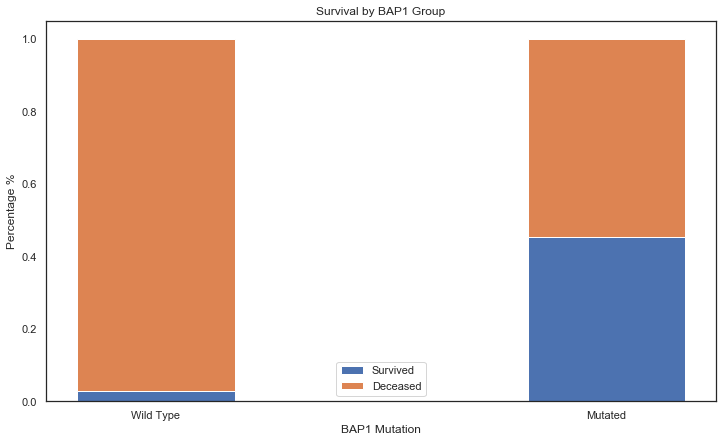

(-4.315970301629611, 1.5890334393695668e-05)


In [765]:
living_group= [sum([1 for p in bap1_grouped_ids[i] if patient_dict[p]['os_status'] == 1])/len(bap1_grouped_ids[i]) for  i in range(2)]
dead_group = [sum([1 for p in bap1_grouped_ids[i] if patient_dict[p]['os_status'] == 0])/len(bap1_grouped_ids[i]) for  i in range(2)]
v = [living_group,dead_group]
N = 2
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('BAP1 Mutation')
plt.title('Survival by BAP1 Group')

plt.xticks(ind, ('Wild Type', 'Mutated'))
plt.legend(loc='best')
plt.show()
print(proportions_ztest([sum([1 for p in bap1_grouped_ids[0] if patient_dict[p]['os_status'] == 1]),sum([1 for p in bap1_grouped_ids[1] if patient_dict[p]['os_status'] == 1])],[len(bap1_grouped_ids[0]),len(bap1_grouped_ids[1])]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0, 0.5, 'PFI time (days)')

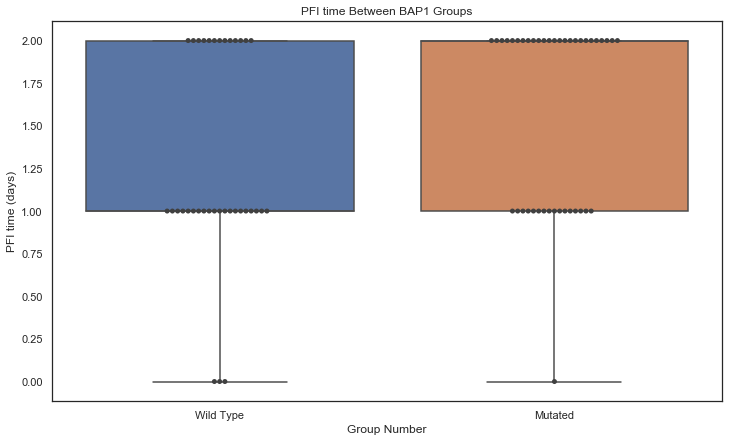

In [680]:
y = [[patient_dict[p]['T'] for p in bap1_grouped_ids[i]] for i in range(2)]
temp_df = pd.DataFrame(data=y)
sns.swarmplot( data=temp_df.T,color=".25")
sns.boxplot(data=temp_df.T)
plt.title("PFI time Between BAP1 Groups")
plt.xlabel("Group Number")
plt.xticks([0, 1], ['Wild Type', "Mutated"])
plt.ylabel("PFI time (days)")

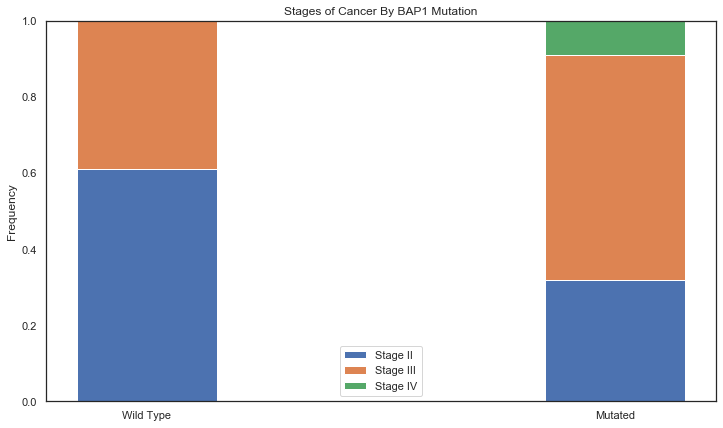

In [932]:
labels = ['Wild Type','Mutated']
cells = ["0","1",'2']
all_means = [[sum([1 for p in i if patient_dict[p]['stage']==int(c)])/len(i) for i in bap1_grouped_ids] for c in cells]
#all_errors = [[np.std(immune_fractions_df.loc[bap1_grouped_ids[i], c]) for i in range(len(bap1_grouped_ids))] for c in cells]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
leb=["Stage II","Stage III", "Stage IV"]
fig, ax = plt.subplots()
ax.bar(x, all_means[0], width, label="Stage II")
ax.bar(x, all_means[1], width,
    label="Stage III",bottom=all_means[0])
ax.bar(x, all_means[2], width,
    label="Stage IV",bottom=[i+j for i,j in zip(all_means[0], all_means[1])])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Stages of Cancer By BAP1 Mutation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [682]:
y[1] = [i for i in y[1] if not np.isnan(i)]
print(np.mean(y[0]),np.std(y[0]),np.mean(y[1]),np.std(y[1]),mannwhitneyu(y[0],y[1]))

print(Counter(y[0]),Counter(y[1]))
obs = [[3,20,13],[1,16,25]]
print(chi2_contingency(np.array(obs)))

1.2777777777777777 0.6060395619242063 1.5714285714285714 0.5408484138857403 MannwhitneyuResult(statistic=565.0, pvalue=0.01563457044720818)
Counter({1: 20, 2: 13, 0: 3}) Counter({2: 25, 1: 16, 0: 1})
(4.800786688944584, 0.09068227690096355, 2, array([[ 1.84615385, 16.61538462, 17.53846154],
       [ 2.15384615, 19.38461538, 20.46153846]]))


Text(0, 0.5, 'Fraction')

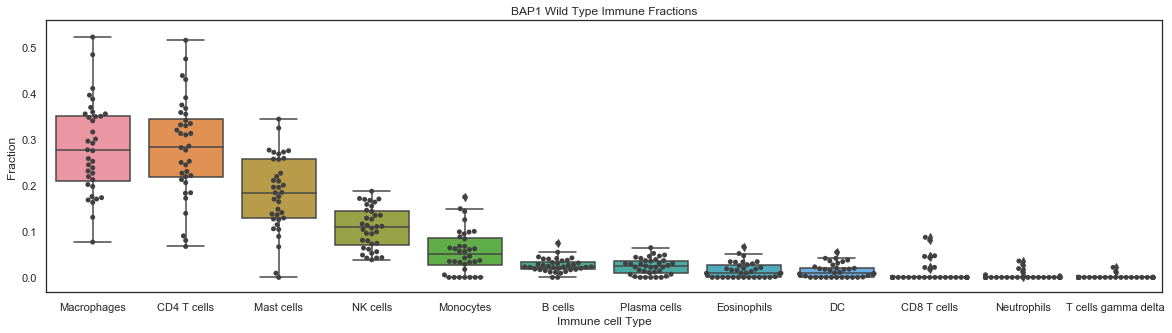

In [691]:
y = [[immune_fractions_df.loc[p,:].values for p in bap1_grouped_ids[i]] for i in range(2)]
temp_df1 = pd.DataFrame(data=y[0])
temp_df1.columns=immune_fractions_df.columns
temp_df1= temp_df1.T.assign(m=temp_df1.mean(axis=0)).sort_values('m',ascending=False).drop('m', axis=1).T
plt.figure(figsize=(20,5))
sns.swarmplot(data=temp_df1,color=".25")
sns.boxplot(data=temp_df1)
plt.title("BAP1 Wild Type Immune Fractions")
plt.xlabel("Immune cell Type")
plt.ylabel("Fraction")

Text(0, 0.5, 'Fraction')

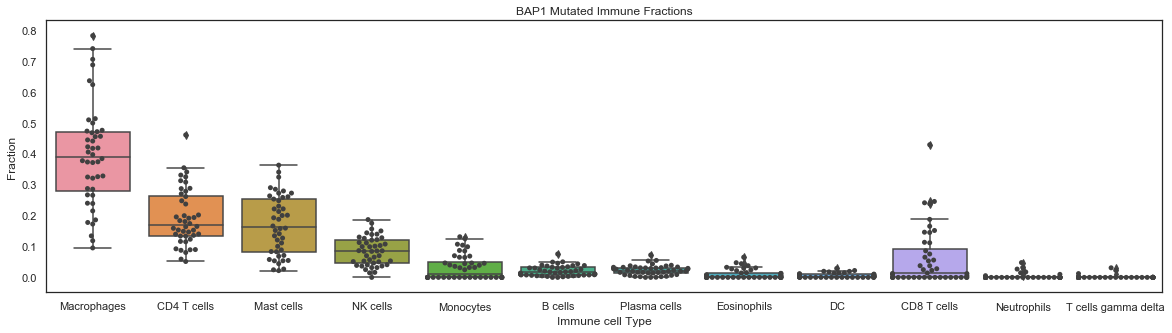

In [692]:
temp_df = pd.DataFrame(data=y[1])
temp_df.columns=immune_fractions_df.columns
temp_df = temp_df[temp_df1.columns]
plt.figure(figsize=(20,5))
sns.swarmplot( data=temp_df,color=".25")
sns.boxplot(data=temp_df)
plt.title("BAP1 Mutated Immune Fractions")
plt.xlabel("Immune cell Type")
plt.ylabel("Fraction")

In [1117]:
l = []
for c in combinations(immune_fractions_df.columns,2):
    x = []
    y = []
    for p in bap1_grouped_ids[1]:#list(patient_dict.keys()): ##
        #if not np.isnan(patient_dict[p][k]):
        x.append(immune_fractions_df.loc[p,c[0]])
        y.append(immune_fractions_df.loc[p,c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

[('Monocytes', 'Macrophages', -0.5962148849475533, 1.9498204207424667e-05), ('NK cells', 'Macrophages', -0.5083862684503688, 0.00042612336900596547), ('Eosinophils', 'DC', 0.48419794782716896, 0.0008675618270418252), ('Plasma cells', 'B cells', 0.4763231638878316, 0.0010815064627389965), ('Monocytes', 'DC', 0.4532499332771047, 0.002003550675273941), ('Monocytes', 'NK cells', 0.45212022517842976, 0.002062724766903638), ('Macrophages', 'DC', -0.4111644325991508, 0.005560461951529596), ('Plasma cells', 'Macrophages', -0.3993714017929828, 0.007239241507625473), ('CD4 T cells', 'Macrophages', -0.38241784837848686, 0.010411795563684607), ('Neutrophils', 'Mast cells', 0.3637645374797478, 0.015212594405388665), ('Neutrophils', 'Macrophages', -0.3615188172777466, 0.015900711071216694), ('Macrophages', 'Mast cells', -0.35451515248284765, 0.01821846201128674), ('B cells', 'Macrophages', -0.34999975846802045, 0.019858997056037095), ('Neutrophils', 'B cells', 0.3473521503471388, 0.02087747750317151

In [950]:
l = []
for c in combinations(list(patient_dict[list(patient_dict.keys())[0]].keys()),2):
    x = []
    y = []
    for p in list(patient_dict.keys()):#list(patient_dict.keys()): ##
        if not np.isnan(patient_dict[p][c[0]]) and not np.isnan(patient_dict[p][c[1]]):
            x.append(patient_dict[p][c[0]])
            y.append(patient_dict[p][c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

[('DSS_time', 'PFI_time', 0.8894680407258508, 6.608004992932464e-28), ('M', 'N', 0.7912323814082447, 2.470578216994976e-18), ('stage', 'T', 0.7672568902113138, 2.5707650548001754e-16), ('tumor_diameter', 'T', 0.7089336820437722, 3.79665342679481e-13), ('tumor_thickness', 'T', 0.5798495660900164, 2.6496242607102903e-08), ('tumor_diameter', 'stage', 0.5659655811353972, 5.4614013170540326e-08), ('tumor_thickness', 'stage', 0.4968540200710213, 2.761132968308888e-06), ('weight', 'N', 0.5869873920972263, 3.842872744442063e-06), ('BAP1_mutation', 'os_status', -0.4825401491657041, 5.8215341576533955e-06), ('tumor_diameter', 'tumor_thickness', 0.45275554230325904, 2.7963334543461177e-05), ('weight', 'M', 0.45044617292595995, 0.0007130350797551089), ('BAP1_mutation', 'stage', -0.32748887033017876, 0.003024047330719037), ('BAP1_mutation', 'PFI_time', 0.3280670066872163, 0.003161316359880518), ('os_status', 'stage', 0.31182064265256193, 0.004867393663632169), ('weight', 'stage', 0.3788053798042706

In [857]:
l = []
for c in combinations(immune_fractions_df.columns,2):
    x = []
    y = []
    for p in bap1_grouped_ids[1]:#bap1_grouped_ids[0]:#list(patient_dict.keys()): ##
        #if not np.isnan(patient_dict[p][k]):
        x.append(immune_fractions_df.loc[p,c[0]])
        y.append(immune_fractions_df.loc[p,c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)
for o in l[:6]:
    print(o[0],"vs.",o[1],"&",o[2],"&",o[3])

[('Monocytes', 'Macrophages', -0.5962148849475533, 1.9498204207424667e-05), ('NK cells', 'Macrophages', -0.5083862684503688, 0.00042612336900596547), ('Eosinophils', 'DC', 0.48419794782716896, 0.0008675618270418252), ('Plasma cells', 'B cells', 0.4763231638878316, 0.0010815064627389965), ('Monocytes', 'DC', 0.4532499332771047, 0.002003550675273941), ('Monocytes', 'NK cells', 0.45212022517842976, 0.002062724766903638), ('Macrophages', 'DC', -0.4111644325991508, 0.005560461951529596), ('Plasma cells', 'Macrophages', -0.3993714017929828, 0.007239241507625473), ('CD4 T cells', 'Macrophages', -0.38241784837848686, 0.010411795563684607), ('Neutrophils', 'Mast cells', 0.3637645374797478, 0.015212594405388665), ('Neutrophils', 'Macrophages', -0.3615188172777466, 0.015900711071216694), ('Macrophages', 'Mast cells', -0.35451515248284765, 0.01821846201128674), ('B cells', 'Macrophages', -0.34999975846802045, 0.019858997056037095), ('Neutrophils', 'B cells', 0.3473521503471388, 0.02087747750317151

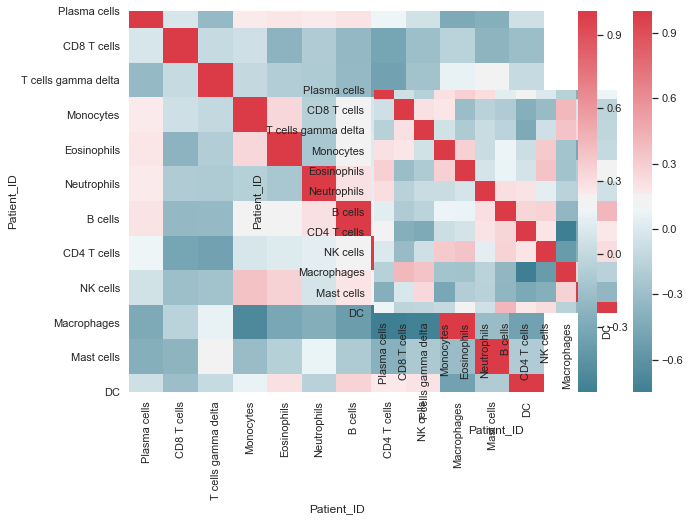

In [893]:
#corr = immune_fractions_df.loc[:,:].corr()
#corr.style.background_gradient(cmap='coolwarm')
f = plt.figure()
ax1 = f.add_subplot(111)
ax2 = f.add_subplot(122)
corr1 = immune_fractions_df.loc[:,:].corr()
corr2 = immune_fractions_df.loc[bap1_grouped_ids[0],:].corr()
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax1)
sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax2)
#plt.matshow(immune_fractions_df.loc[:,:].corr())
#plt.show()

(-0.38241784837848686, 0.010411795563684607)
(-0.7465739318810355, 1.71181835779746e-07)


Text(0.5, 1.0, 'B cells vs. DSS time (color BAP1 mutation)')

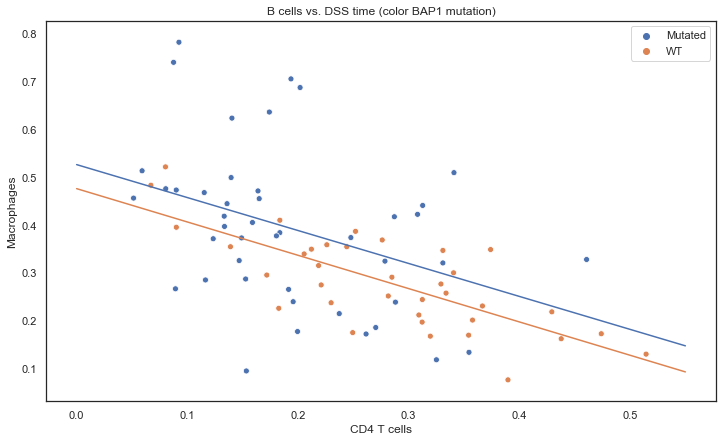

In [784]:
sns.scatterplot(immune_fractions_df.loc[:,"CD4 T cells"], immune_fractions_df.loc[:,"Macrophages"], hue=["WT" if patient_dict[p]["BAP1_mutation"] == 0 else "Mutated" for p in list(immune_fractions_df.index)])
print(stats.pearsonr(immune_fractions_df.loc[bap1_grouped_ids[1],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[1],"Macrophages"]))
print(stats.pearsonr(immune_fractions_df.loc[bap1_grouped_ids[0],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[0],"Macrophages"]))

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[1],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[1],"Macrophages"], 1)
x = np.linspace(0,.55,10)
plt.plot(x, b + m * x, '-')

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[0],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[0],"Macrophages"], 1)
x = np.linspace(0,.55,10)
plt.plot(x, b + m * x, '-')



plt.title("B cells vs. DSS time (color BAP1 mutation)")
#plt.ylabel("DSS time (days)")
#plt.text(.06,1600,'BAP1 WT, R: .429, P-val: .0091', fontsize=10, rotation=19, rotation_mode='anchor')
#plt.text(.06,700,'BAP1 Mutated, R: -0.0357, P-val: 0.817', fontsize=10, rotation=-1, rotation_mode='anchor')

In [ ]:
l = []
for k in list(patient_dict[list(patient_dict.keys())[0]].keys()):
    for i in range(len(immune_fractions_df.columns)):
        x = []
        y = []
        for p in bap1_grouped_ids[0]:#list(patient_dict.keys()): ##
            if not np.isnan(patient_dict[p][k]):
                x.append(immune_fractions_df.loc[p,immune_fractions_df.columns[i]])
                y.append(patient_dict[p][k])
        x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            l.append((immune_fractions_df.columns[i],k, r, p))
            #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

(0.20533191569777254, 0.06767547388159235)


Text(0.06, 700, 'BAP1 Mutated, R: -0.0357, P-val: 0.817')

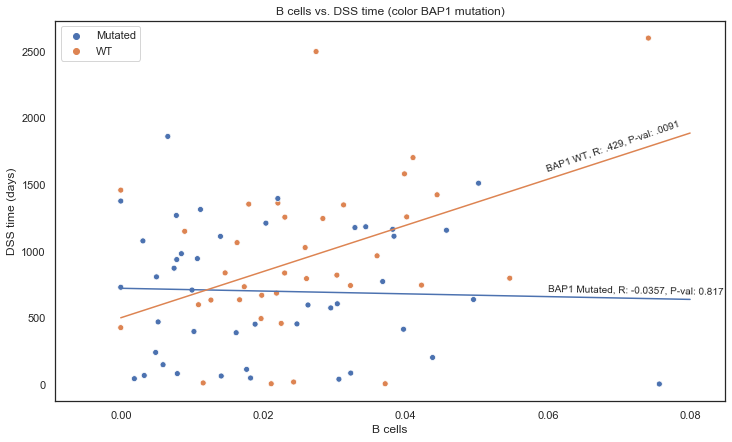

In [753]:
sns.scatterplot(immune_fractions_df.loc[:,"B cells"], [patient_dict[p]["DSS_time"] for p in list(immune_fractions_df.index)], hue=["WT" if patient_dict[p]["BAP1_mutation"] == 0 else "Mutated" for p in list(immune_fractions_df.index)])
print(stats.pearsonr(immune_fractions_df.loc[:,"B cells"], [patient_dict[p]["DSS_time"] for p in list(immune_fractions_df.index)]))


b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[1],"B cells"], [patient_dict[p]["DSS_time"] for p in bap1_grouped_ids[1]], 1)
x = np.linspace(0,.08,10)
sns.lineplot(x, b + m * x)

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[0],"B cells"], [patient_dict[p]["DSS_time"] for p in bap1_grouped_ids[0]], 1)
x = np.linspace(0,.08,10)
plt.plot(x, b + m * x, '-')

plt.title("B cells vs. DSS time (color BAP1 mutation)")
plt.ylabel("DSS time (days)")
plt.text(.06,1600,'BAP1 WT, R: .429, P-val: .0091', fontsize=10, rotation=19, rotation_mode='anchor')
plt.text(.06,700,'BAP1 Mutated, R: -0.0357, P-val: 0.817', fontsize=10, rotation=-1, rotation_mode='anchor')

In [760]:
print_significant_immune_differences(immune_fractions_df,bap1_grouped_ids)
for i in immune_fractions_df.columns:
    print(i,"WT", round(immune_fractions_df.loc[bap1_grouped_ids[0],i].mean(),4),"±",round(immune_fractions_df.loc[bap1_grouped_ids[0],i].std(),4))
    print(i,"M", round(immune_fractions_df.loc[bap1_grouped_ids[1],i].mean(),4),"±", round(immune_fractions_df.loc[bap1_grouped_ids[1],i].std(),4))

CD8 T cells  difference between groups  0   1  p-value:  0.00027535644116621975
Monocytes  difference between groups  0   1  p-value:  0.007911008312463533
Eosinophils  difference between groups  0   1  p-value:  0.030634448044689143
B cells  difference between groups  0   1  p-value:  0.034145127411382696
CD4 T cells  difference between groups  0   1  p-value:  0.00010020775928581038
NK cells  difference between groups  0   1  p-value:  0.016484882575862253
Macrophages  difference between groups  0   1  p-value:  0.00037538175596295314
DC  difference between groups  0   1  p-value:  0.007948980537117336
Plasma cells WT 0.0239 ± 0.0174
Plasma cells M 0.023 ± 0.0159
CD8 T cells WT 0.0101 ± 0.0226
CD8 T cells M 0.0618 ± 0.0932
T cells gamma delta WT 0.0009 ± 0.0041
T cells gamma delta M 0.0015 ± 0.006
Monocytes WT 0.0554 ± 0.046
Monocytes M 0.0325 ± 0.0399
Eosinophils WT 0.0154 ± 0.017
Eosinophils M 0.0102 ± 0.016
Neutrophils WT 0.0029 ± 0.0081
Neutrophils M 0.0035 ± 0.0098
B cells WT 0.

### Immune Group Analysis

In [707]:
l = []
for k in list(patient_dict[list(patient_dict.keys())[0]].keys()):
    for i in range(len(immune_fractions_df.columns)):
        x = []
        y = []
        for p in bap1_grouped_ids[1]:#list(patient_dict.keys()): ##
            if not np.isnan(patient_dict[p][k]):
                x.append(immune_fractions_df.loc[p,immune_fractions_df.columns[i]])
                y.append(patient_dict[p][k])
        x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            l.append((immune_fractions_df.columns[i],k, r, p))
            #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

[('NK cells', 'gender', 0.3384701753822574, 0.024620132160440497), ('Mast cells', 'os_status', -0.31870652626775653, 0.034985202514075955)]


In [554]:
print_significant_phenotype_differences(immune_ids)

BAP1_mutation  difference between groups  0   1  p-value:  0.0007047408895491564
BAP1_mutation  difference between groups  1   2  p-value:  0.04218942531216254
DSS_time  difference between groups  0   1  p-value:  0.04206691610165093
PFI_time  difference between groups  0   1  p-value:  0.023274599542213493
tumor_thickness  difference between groups  0   2  p-value:  0.007835914084156678


### All Patient Analysis

In [555]:
for c in combinations(list(patient_dict[list(patient_dict.keys())[0]].keys()),2):
    if c[0] != c[1]:
        x = []
        y = []
        for p in list(patient_dict.keys()):
             if not np.isnan(patient_dict[p][c[0]]) and not np.isnan(patient_dict[p][c[1]]):
                x.append(patient_dict[p][c[0]])
                y.append(patient_dict[p][c[1]])
        x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            print(c[0], " and ",c[1],": ", r, p)

BAP1_mutation  and  DSS_time :  0.2278673159062442 0.04206686149449625
BAP1_mutation  and  os_status :  -0.4825401491657041 5.8215341576533955e-06
BAP1_mutation  and  PFI_time :  0.3280670066872163 0.003161316359880518
BAP1_mutation  and  stage :  -0.32748887033017876 0.003024047330719037
BAP1_mutation  and  T :  -0.24799284109888797 0.028584292076066792
DSS_time  and  PFI_time :  0.8894680407258508 6.608004992932464e-28
DSS_time  and  age :  -0.23427182759731735 0.03647293153696037
os_status  and  PFI_time :  -0.23852873885055376 0.034263493321814
os_status  and  stage :  0.31182064265256193 0.004867393663632169
os_status  and  T :  0.28931045076099376 0.010197462940063969
PFI_time  and  M :  -0.25613590600200775 0.022699741424394793
tumor_diameter  and  tumor_thickness :  0.45275554230325904 2.7963334543461177e-05
tumor_diameter  and  stage :  0.5659655811353972 5.4614013170540326e-08
tumor_diameter  and  T :  0.7089336820437722 3.79665342679481e-13
weight  and  stage :  0.3788053798

In [556]:
gender_grouped_ids = [[],[]]
for p in list(patient_dict.keys()):
    if patient_dict[p]['gender'] == 0:
        gender_grouped_ids[0].append(p)
    else:
        gender_grouped_ids[1].append(p)

In [557]:
print_significant_immune_differences(immune_fractions_df,gender_grouped_ids)

In [558]:
## Test every immune cell against every group and print and return it if significant
def print_significant_phenotype_differences(grouped_ids):
    for p in list(patient_dict[list(patient_dict.keys())[0]].keys()):
        for c in combinations(list(range(len(grouped_ids))),2):
            if set([patient_dict[i][p] for i in grouped_ids[c[0]]]) != set([patient_dict[i][p] for i in grouped_ids[c[1]]]):
                mw_result = mannwhitneyu([patient_dict[i][p] for i in grouped_ids[c[0]]],[patient_dict[i][p] for i in grouped_ids[c[1]]])
                if mw_result[1] < .05:
                    print(p," difference between groups ",c[0]," ",c[1]," p-value: ", mw_result[1])

In [559]:
print_significant_phenotype_differences(gender_grouped_ids)

weight  difference between groups  0   1  p-value:  0.02619959123463816
tumor_thickness  difference between groups  0   1  p-value:  0.030324889542422684
gender  difference between groups  0   1  p-value:  3.2672101244356916e-19


### Find Genes Highly Correlated with Immune Fraction

In [809]:
l = []
grp = list(gene_expression.index)
for gene_name in list(most_variant.columns):
    for i in ['CD4 T cells']: #immune_fractions_df.columns:
        r, p = stats.pearsonr(immune_fractions_df.loc[grp,i],gene_expression.loc[grp,gene_name])
        
        if p < .05:
            l.append((gene_name,i,r,p))
            #print("|",gene_name,"|",i,"|",r,"|",p,"|")
            
l = sorted(l, key=lambda g: g[3], reverse=False)
print(l[:20])

[('FTL', 'CD4 T cells', -0.480203139045445, 6.554755780932701e-06), ('PFN1', 'CD4 T cells', -0.4449295492271925, 3.5483662502820363e-05), ('IFITM3', 'CD4 T cells', -0.4435056052774686, 3.784180769807233e-05), ('TMSB10', 'CD4 T cells', -0.4299742884672185, 6.876923155235688e-05), ('ARHGDIA', 'CD4 T cells', -0.42460033694526766, 8.657969441608614e-05), ('GPR143', 'CD4 T cells', -0.3975209420779078, 0.0002609567896315819), ('UBB', 'CD4 T cells', -0.39581252194917615, 0.00027890220474072983), ('ACTB', 'CD4 T cells', -0.38788954478443805, 0.00037790636293955223), ('LGALS3BP', 'CD4 T cells', -0.3864320823876205, 0.00039929686985963896), ('PPIB', 'CD4 T cells', -0.38228508319178767, 0.0004663720324348679), ('VAT1', 'CD4 T cells', -0.3809607333703606, 0.0004898717054551357), ('CYGB', 'CD4 T cells', -0.37895516105504523, 0.0005275259474655609), ('CFL1', 'CD4 T cells', -0.3784374742745147, 0.0005376656228126065), ('TMSL3', 'CD4 T cells', -0.3751160622328159, 0.0006070703664606377), ('ANXA2', 'CD

In [811]:
l2 = []
for c in combinations([i[0] for i in l[:20]],2):
    r, p = stats.pearsonr(gene_expression.loc[:,c[0]],gene_expression.loc[:,c[1]])
    l2.append((c[0],c[1],r,p))
l2 = sorted(l2, key=lambda g: g[3], reverse=False)
print(l2[:4])

[('PFN1', 'UBB', 0.9226278707044171, 5.190892952289626e-34), ('ACTB', 'ARF1', 0.9219485786906516, 7.204796884488747e-34), ('ACTB', 'CFL1', 0.9174137256746249, 5.973715411529587e-33), ('PFN1', 'ACTB', 0.9111989600883383, 8.974678085158305e-32)]


In [703]:
l = []
for gene_name in list(most_variant.columns):
    for i in ['DSS_time',"PFI_time"]:#list(patient_dict[list(patient_dict.keys())[0]].keys())[1:]: # list(patient_dict[list(patient_dict.keys())[0]].keys())[1:]
        inc = [p for p in list(patient_dict.keys()) if not np.isnan(patient_dict[p][i])] 
        r, p = stats.pearsonr([patient_dict[p][i] for p in inc],gene_expression.loc[inc,gene_name])
        
        if p < .05:
            l.append((gene_name,i,r,p))
            #print("|",gene_name,"|",i,"|",r,"|",p,"|")
            
l = sorted(l, key=lambda g: g[3], reverse=False)
print(l[:10])

[('TTYH3', 'PFI_time', -0.37324990352789633, 0.000704147060746975), ('GPR143', 'PFI_time', -0.35904177181369135, 0.0011563189748507493), ('HDLBP', 'PFI_time', -0.34078196417068873, 0.0021177121829326203), ('APP', 'PFI_time', -0.3311783262625521, 0.0028704949449897574), ('TSPAN10', 'PFI_time', -0.3276009802212354, 0.003207072656133221), ('TTYH3', 'DSS_time', -0.3253198962554266, 0.003234795629346116), ('SPON2', 'PFI_time', -0.32316142311011703, 0.003673533714084322), ('TUBB4', 'PFI_time', 0.3204759138490757, 0.00398420236425677), ('IGFBP7', 'PFI_time', -0.3171270933418595, 0.0044042340333335815), ('PTTG1IP', 'PFI_time', -0.3150215604867599, 0.004688048517438809)]


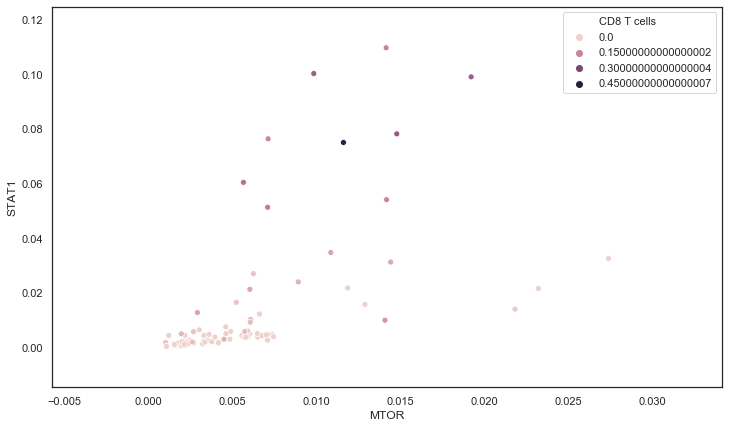

In [805]:
subsection = list(gene_expression.index)# list(gene_expression.index)   # immune_ids[1] 
sns.scatterplot(gene_expression.loc[subsection,"MTOR"], gene_expression.loc[subsection,"STAT1"],hue=immune_fractions_df.loc[subsection,"CD8 T cells"])

### Immune Clustering

In [564]:
immune_dataframes = cluster_gene_variance(immune_fractions_df,variance_threshold=.0000001,pca_components=5,n_clusters=3)
immune_ids = [list(immune_dataframes[i].index) for i in range(len(immune_dataframes))]

Tot Explained Var (PCA):  0.9804295028442487
Frac Var Exp (k-menas):  0.5023702495685572
Counter({2: 37, 0: 36, 1: 7})


In [565]:
print("Percentage of total BAP1 -1 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/44 for i in range(len(immune_ids))])
print("Percentage of total BAP1 0 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/36 for i in range(len(immune_ids))])
print("Percentage of BAP1 -1 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/len(immune_ids[i]) for i in range(len(immune_ids))])
print("Percentage of BAP1 0 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/len(immune_ids[i]) for i in range(len(immune_ids))])

Percentage of total BAP1 -1 by cluster:  [0.2727272727272727, 0.1590909090909091, 0.5681818181818182]
Percentage of total BAP1 0 by cluster:  [0.6666666666666666, 0.0, 0.3333333333333333]
Percentage of BAP1 -1 by cluster:  [0.3333333333333333, 1.0, 0.6756756756756757]
Percentage of BAP1 0 by cluster:  [0.6666666666666666, 0.0, 0.32432432432432434]


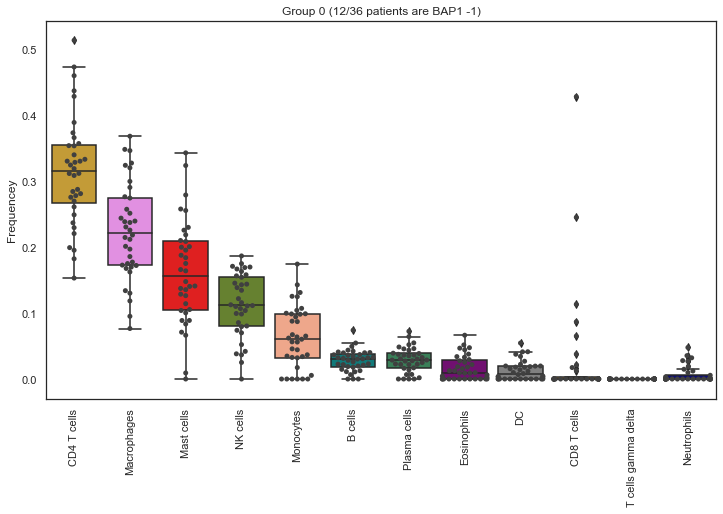

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [566]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[immune_ids[0]], "Group 0 (12/36 patients are BAP1 -1)")

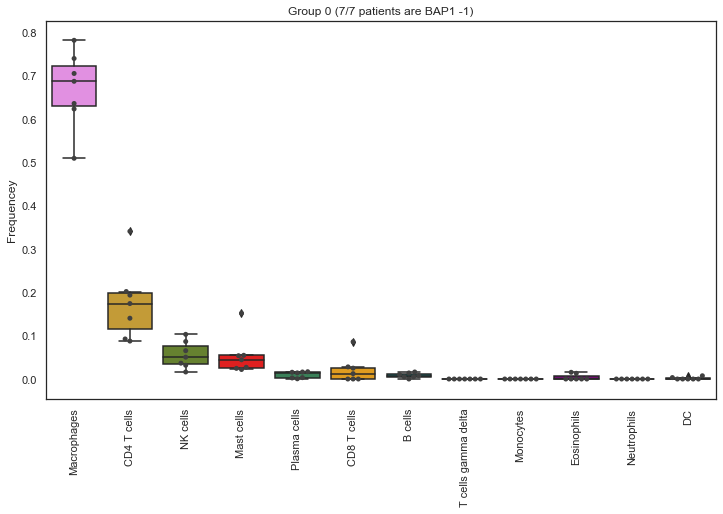

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [567]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[immune_ids[1]], "Group 0 (7/7 patients are BAP1 -1)")

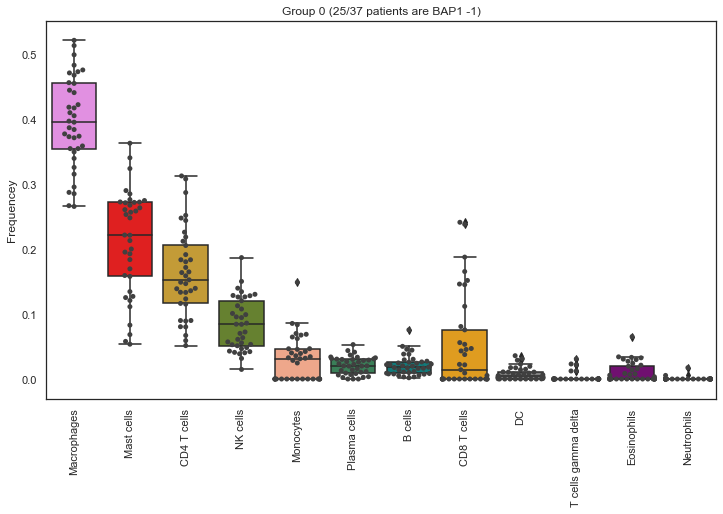

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [568]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[immune_ids[2]], "Group 0 (25/37 patients are BAP1 -1)")

In [569]:
print_significant_immune_differences(immune_fractions_df,immune_ids)

Plasma cells  difference between groups  0   1  p-value:  0.004891081997589247
Plasma cells  difference between groups  0   2  p-value:  0.032232527243319896
Plasma cells  difference between groups  1   2  p-value:  0.02915080005873304
CD8 T cells  difference between groups  0   2  p-value:  0.004446560374863961
T cells gamma delta  difference between groups  0   2  p-value:  0.012061533882533351
Monocytes  difference between groups  0   1  p-value:  0.00024511683933523524
Monocytes  difference between groups  0   2  p-value:  0.0006747190973795881
Monocytes  difference between groups  1   2  p-value:  0.005707472495163921
Eosinophils  difference between groups  0   1  p-value:  0.034617579585382884
Eosinophils  difference between groups  0   2  p-value:  0.045174784660872006
Neutrophils  difference between groups  0   1  p-value:  0.04215195208659835
Neutrophils  difference between groups  0   2  p-value:  0.0011709236503587793
B cells  difference between groups  0   1  p-value:  0.00

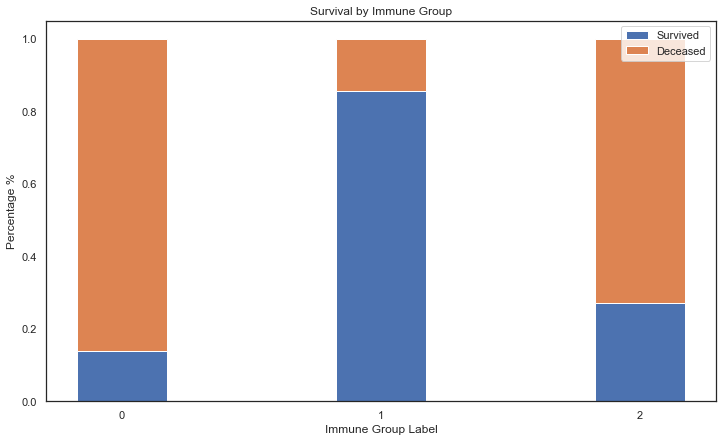

0 1 (-3.9851181383340535, 6.744656105223968e-05)
0 2 (-1.3889536072733462, 0.16484685778080221)
1 2 (2.95992725123404, 0.0030771169562098274)


In [571]:
N = 3
living_group= [sum([1 for p in immune_ids[i] if patient_dict[p]['os_status'] == 1])/len(immune_ids[i]) for  i in range(N)]
dead_group = [sum([1 for p in immune_ids[i] if patient_dict[p]['os_status'] == 0])/len(immune_ids[i]) for  i in range(N)]
v = [living_group,dead_group]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('Immune Group Label')
plt.title('Survival by Immune Group')

plt.xticks(ind, ('0', '1','2'))
plt.legend(loc='best')
plt.show()

for c in combinations(range(N),2):
    print(c[0],c[1],proportions_ztest([sum([1 for p in immune_ids[c[0]] if patient_dict[p]['os_status'] == 1]),sum([1 for p in immune_ids[c[1]] if patient_dict[p]['os_status'] == 1])],[len(immune_ids[c[0]]),len(immune_ids[c[1]])]))

In [572]:
sum([1 for p in bap1_grouped_ids[1] if patient_dict[p]['os_status'] == 0])/len(bap1_grouped_ids[1])

0.5454545454545454

In [573]:
def plot_important_immune_cells(groups,labels):
    #labels = ['CD4 ≈ CD8 < M','CD8 < M < CD4','CD4 < CD8 ≈ M','CD8 < CD4 < M']
    cells = ["Macrophages","CD4 T cells",'Mast cells',"CD8 T cells","B cells",'Plasma cells']
    all_means = [[np.mean(immune_fractions_df.loc[groups[i], c]) for i in range(len(groups))] for c in cells]
    all_errors = [[np.std(immune_fractions_df.loc[groups[i], c]) for i in range(len(groups))] for c in cells]

    x = np.arange(len(labels))  # the label locations
    width = 0.9  # the width of the bars

    fig, ax = plt.subplots()
    for i in range(len(cells)):
        ax.bar(x - ((i)-(len(cells)-1)/2)*width/len(cells), all_means[i], width/len(cells), label=cells[i],yerr=all_errors[i])


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequency')
    ax.set_title('Immune Cell Fractions By Immune Cluster')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

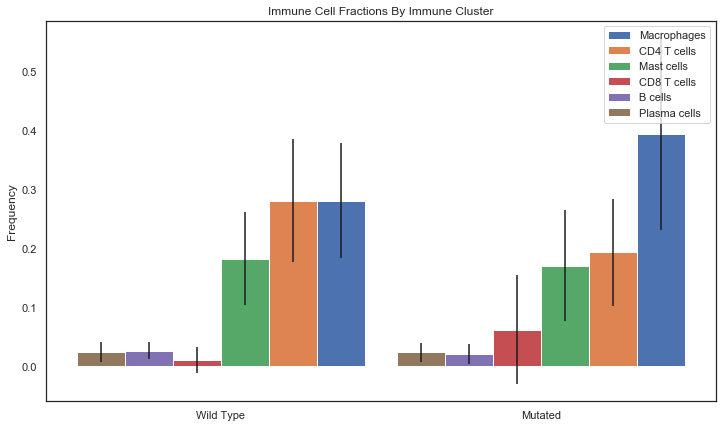

In [574]:
plot_important_immune_cells(bap1_grouped_ids,["Wild Type", "Mutated"])

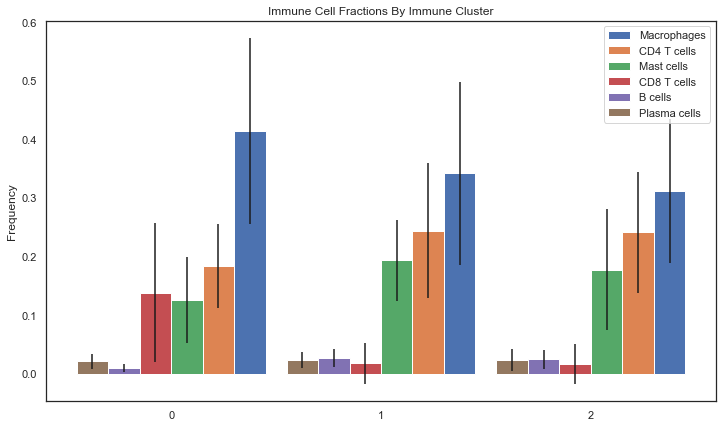

In [575]:
plot_important_immune_cells(grouped_ids,["0", "1","2"])

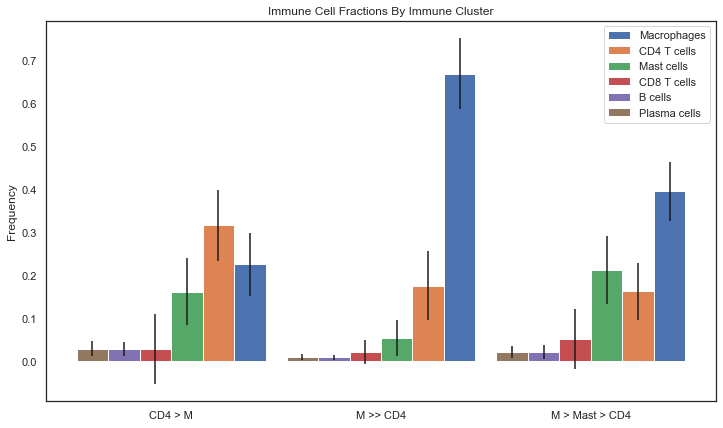

In [576]:
plot_important_immune_cells(immune_ids,["CD4 > M", "M >> CD4","M > Mast > CD4"])

In [577]:
def percent_in_group(group,groups):
    l = [0 for i in range(len(groups))]
    for p in group:
        for i in range(len(groups)):
            if p in groups[i]:
                l[i] += 1
    print([l[i] for i in range(len(l))])

In [578]:
percent_in_group(immune_ids[0],grouped_ids)
percent_in_group(immune_ids[1],grouped_ids)
percent_in_group(immune_ids[2],grouped_ids)

[2, 17, 17]
[3, 3, 1]
[9, 14, 14]


In [579]:
percent_in_group(grouped_ids[0],immune_ids)
percent_in_group(grouped_ids[1],immune_ids)
percent_in_group(grouped_ids[2],immune_ids)

[2, 3, 9]
[17, 3, 14]
[17, 1, 14]


### Causal Analysis

In [852]:
from causality.estimation.nonparametric import CausalEffect
# load the data into a dataframe:
p = list(gene_expression.index)
causal_dict = {}
causal_dict['HLA-B'] = gene_expression.loc[p,"HLA-B"]
causal_dict['HLA-A'] = gene_expression.loc[p,"HLA-A"]
causal_dict['HLA-C'] = gene_expression.loc[p,"HLA-C"]
causal_dict['CD74'] = gene_expression.loc[p,"CD74"]
causal_dict['B2M'] = gene_expression.loc[p,"B2M"]
#causal_dict['BAP1'] = gene_expression.loc[p,"BAP1"]
causal_dict['HLA-DRA'] = gene_expression.loc[p,"HLA-DRA"]
causal_dict['HLA-E'] = gene_expression.loc[p,"HLA-E"]
causal_dict['STAT1'] = gene_expression.loc[p,"STAT1"]
causal_dict['TAP1'] = gene_expression.loc[p,"TAP1"]
causal_dict['TTYH3'] = gene_expression.loc[p,"TTYH3"]
causal_dict['Mast cells'] = immune_fractions_df.loc[p,"Mast cells"]
causal_dict['CD8 T cells'] = immune_fractions_df.loc[p,"CD8 T cells"]
causal_dict['Macrophages'] = immune_fractions_df.loc[p,"Macrophages"]
#causal_dict['PCDHGC3'] = gene_expression.loc[p,"PCDHGC3"]
causal_dict['BAP1'] = [0 if patient_dict[i]["BAP1_mutation"] == 0 else -1 for i in p]
causal_dict['DSS_time'] = [patient_dict[i]['DSS_time'] for i in p]
causal_dict['Mortality Rate'] = [0 if patient_dict[i]["os_status"] == 0 else 1 for i in p]


X = pd.DataFrame(causal_dict)

# define the variable types: 'c' is 'continuous'. The variables defined here
# are the ones the search is performed over -- NOT all the variables defined
# in the data frame.
variable_types = {'HLA-A' : 'c', 'HLA-C' : 'c', 'CD74' : 'c', 'B2M' : 'c','STAT1':'c', 'HLA-E' : 'c','HLA-DRA':'c', 'HLA-B' : 'c'}
#  'HLA-A' : 'c', 'HLA-C' : 'c', 'CD74' : 'c', 'B2M' : 'c','STAT1':'c', 'HLA-E' : 'c','HLA-DRA':'c', 'HLA-B' : 'c','CD8 T cells': 'c', 'Mortality Rate' : 'd'
# run the search
ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(X, variable_types)

In [853]:
graph.edges(data=True)

EdgeDataView([('HLA-A', 'HLA-C', {'marked': True, 'arrows': ['HLA-C', 'HLA-C']}), ('HLA-A', 'B2M', {'marked': False, 'arrows': ['HLA-A', 'B2M', 'B2M']}), ('HLA-A', 'HLA-E', {'marked': False, 'arrows': ['HLA-A', 'HLA-E']}), ('HLA-C', 'B2M', {'marked': False, 'arrows': ['B2M']}), ('HLA-C', 'HLA-B', {'marked': False, 'arrows': ['HLA-C', 'HLA-B']}), ('CD74', 'HLA-DRA', {'marked': False, 'arrows': ['HLA-DRA']}), ('CD74', 'HLA-B', {'marked': False, 'arrows': ['HLA-B']}), ('B2M', 'STAT1', {'marked': True, 'arrows': ['B2M', 'B2M', 'B2M']}), ('B2M', 'HLA-B', {'marked': False, 'arrows': ['B2M', 'HLA-B']}), ('STAT1', 'HLA-E', {'marked': True, 'arrows': ['HLA-E', 'HLA-E']}), ('STAT1', 'HLA-DRA', {'marked': False, 'arrows': ['STAT1', 'HLA-DRA']}), ('STAT1', 'HLA-B', {'marked': False, 'arrows': ['STAT1', 'HLA-B']})])

### Try to Find High Correlation Avenues

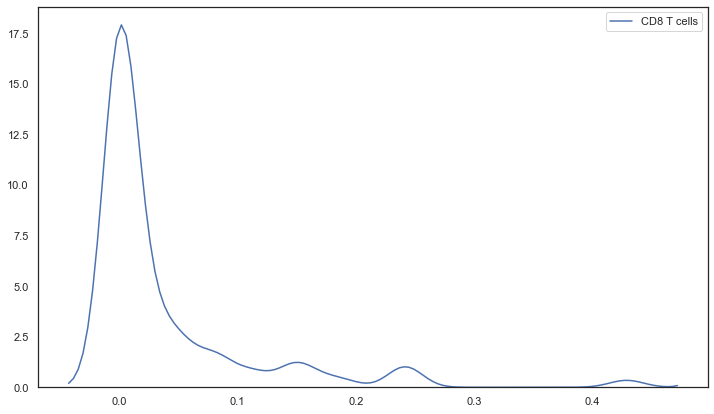

In [824]:
sns.kdeplot(immune_fractions_df.loc[:,"CD8 T cells"])

### Immune cell and BAP1 mutation conditional tests on mortality rate

In [845]:
cell = "CD8 T cells"
cd8_split = np.quantile(immune_fractions_df.loc[:,cell],.6) 
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cd8_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cd8_split]
bap11_and_cd8_high = [p for p in higher_cd8 if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_high),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_low),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_high),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_low),len(bap10_and_cd8_low))

0.5 24
0.6 20
0.875 8
1.0 28


In [846]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = sum([1 for p in bap1_cd8_grps[c[0]] if patient_dict[p]['os_status'] == 0])
    f2 = sum([1 for p in bap1_cd8_grps[c[1]] if patient_dict[p]['os_status'] == 0])
    z,p = proportions_ztest([f1,f2],[len(bap1_cd8_grps[c[0]]),len(bap1_cd8_grps[c[1]])])
    print(c[0],c[1],p)

0 1 0.5071224553598253
0 2 0.06144389048998359
0 3 1.988788346719174e-05
1 2 0.1592549370323304
1 3 0.00024631562167381447
2 3 0.0577795711235973


### Immune call conditional Tests on mortlaity rate

In [585]:
cell = "Mast cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.25) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(sum([1 for p in bap11_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_high),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(sum([1 for p in bap11_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_low),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(sum([1 for p in bap10_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_high),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(sum([1 for p in bap10_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_low),len(bap10_and_cd8_low))

0.8461538461538461 13
0.0 7
0.8085106382978723 47
0.7692307692307693 13


In [586]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = sum([1 for p in bap1_cd8_grps[c[0]] if patient_dict[p]['os_status'] == 0])
    f2 = sum([1 for p in bap1_cd8_grps[c[1]] if patient_dict[p]['os_status'] == 0])
    z,p = proportions_ztest([f1,f2],[len(bap1_cd8_grps[c[0]]),len(bap1_cd8_grps[c[1]])])
    print(c[0],c[1],p)

0 1 0.000285623864453138
0 2 0.7562205107260059
0 3 0.6187565913004274
1 2 1.2397576264796144e-05
1 3 0.0010320139151629923
2 3 0.7540008879177461


### Immune cell tests on DSS_time

In [588]:
cell = "Mast cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.75) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap11_and_cd8_high]),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap11_and_cd8_low]),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap10_and_cd8_high]),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap10_and_cd8_low]),len(bap10_and_cd8_low))

411.0 4
544.375 16
820.4375 16
945.5681818181819 44


In [589]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = [patient_dict[p]['DSS_time'] for p in bap1_cd8_grps[c[0]]]
    f2 = [patient_dict[p]['DSS_time'] for p in bap1_cd8_grps[c[1]]]
    z,p = mannwhitneyu(f1,f2)
    print(c[0],c[1],p)

0 1 0.2392604882720989
0 2 0.07151335763599936
0 3 0.041405256989182584
1 2 0.043186753517177684
1 3 0.007163317317048261
2 3 0.3472196414918941


In [590]:
cell = "CD4 T cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.75) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap11_and_cd8_high]),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap11_and_cd8_low]),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap10_and_cd8_high]),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap10_and_cd8_low]),len(bap10_and_cd8_low))

233.5 2
nan 18
885.9444444444445 18
767.9761904761905 42


In [591]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = [patient_dict[p]['PFI_time'] for p in bap1_cd8_grps[c[0]]]
    f2 = [patient_dict[p]['PFI_time'] for p in bap1_cd8_grps[c[1]]]
    z,p = mannwhitneyu(f1,f2)
    print(c[0],c[1],p)

0 1 0.3763920663249235
0 2 0.04448650585090667
0 3 0.09749655291390957
1 2 0.016355791764910223
1 3 0.033558979871200906
2 3 0.2567721184992868


### Immune cell tests on tumor thickness

In [592]:
cell = "Mast cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.75) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap11_and_cd8_high]),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap11_and_cd8_low]),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap10_and_cd8_high]),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap10_and_cd8_low]),len(bap10_and_cd8_low))

11.475 4
10.6375 16
10.875 16
10.08159090909091 44


In [593]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = [patient_dict[p]['tumor_thickness'] for p in bap1_cd8_grps[c[0]]]
    f2 = [patient_dict[p]['tumor_thickness'] for p in bap1_cd8_grps[c[1]]]
    z,p = mannwhitneyu(f1,f2)
    print(c[0],c[1],p)

0 1 0.4622176356093006
0 2 0.3878722570734663
0 3 0.17507855001361927
1 2 0.4773629259832669
1 3 0.2760770298441565
2 3 0.17626182593835116


In [843]:
cell1_split = np.quantile(immune_fractions_df.loc[:,"CD8 T cells"],.6) 
print(cell1_split)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, "CD8 T cells"] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, "CD8 T cells"] < cell1_split]
print(sum([1 for p in higher_cd8 if patient_dict[p]['os_status'] == 0])/len(higher_cd8),len(higher_cd8))
print(sum([1 for p in lower_cd8 if patient_dict[p]['os_status'] == 0])/len(lower_cd8),len(lower_cd8))

0.010504558683694137
0.59375 32
0.8333333333333334 48


In [844]:
f1 = sum([1 for p in higher_cd8 if patient_dict[p]['os_status'] == 0])
f2 = sum([1 for p in lower_cd8 if patient_dict[p]['os_status'] == 0])
proportions_ztest([f1,f2],[len(higher_cd8),len(lower_cd8)])

(-2.385951169009663, 0.017035012800478498)

### Differences in mortality rate between high and low size tumors

16.529322033898307 3.483138495330052


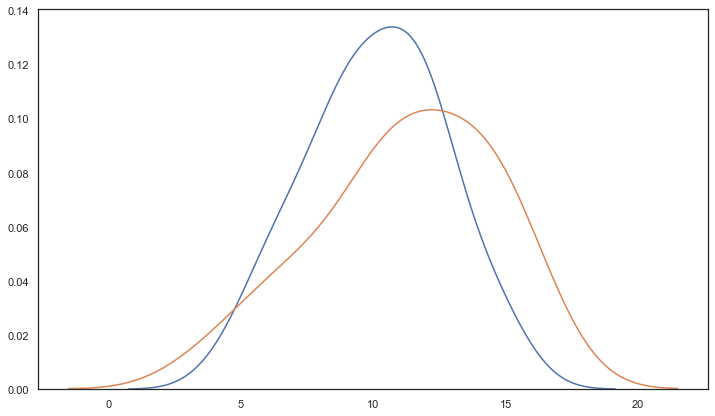

In [1208]:
sns.kdeplot([patient_dict[p]['tumor_thickness'] for p in notnan if patient_dict[p]['os_status'] == 0])
sns.kdeplot([patient_dict[p]['tumor_thickness'] for p in notnan if patient_dict[p]['os_status'] == 1])
print(np.mean([patient_dict[p]['tumor_diameter'] for p in notnan if patient_dict[p]['os_status'] == 0]),np.std([patient_dict[p]['tumor_diameter'] for p in notnan if patient_dict[p]['os_status'] == 0]))

In [1206]:
notnan = [p for p in list(patient_dict.keys()) if not np.isnan(patient_dict[p]['tumor_diameter'])]
rad_split = np.quantile([patient_dict[p]['tumor_thickness'] for p in notnan],.75) 
print(rad_split)
higher_size = [p for p in list(immune_fractions_df.index) if patient_dict[p]['tumor_thickness'] > rad_split]
lower_size = [p for p in list(immune_fractions_df.index) if patient_dict[p]['tumor_thickness'] < rad_split]
bap11_and_cd8_high = [p for p in higher_size if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_high),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_size if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_low),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_size if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_high),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_size if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_low),len(bap10_and_cd8_low))

12.0
0.3076923076923077 13
0.6428571428571429 28
1.0 7
0.9545454545454546 22


In [1196]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = sum([1 for p in bap1_cd8_grps[c[0]] if patient_dict[p]['os_status'] == 0])
    f2 = sum([1 for p in bap1_cd8_grps[c[1]] if patient_dict[p]['os_status'] == 0])
    z,p = proportions_ztest([f1,f2],[len(bap1_cd8_grps[c[0]]),len(bap1_cd8_grps[c[1]])])
    print(c[0],c[1],p)

0 1 0.04025478594011575
0 2 0.002993889045663305
0 3 3.704064506136519e-06
1 2 0.061523991792996606
1 3 0.0019344915150805574
2 3 0.6182917208464244


In [1197]:
print_significant_immune_differences(immune_fractions_df,bap1_cd8_grps)

CD8 T cells  difference between groups  0   2  p-value:  0.030172969717036684
CD8 T cells  difference between groups  0   3  p-value:  0.010655781170286921
CD8 T cells  difference between groups  1   2  p-value:  0.014246519703291313
CD8 T cells  difference between groups  1   3  p-value:  0.0023325872412129243
Monocytes  difference between groups  0   3  p-value:  0.04473079424064757
Monocytes  difference between groups  1   3  p-value:  0.009734220971654247
Eosinophils  difference between groups  0   2  p-value:  0.04519205922467979
Eosinophils  difference between groups  0   3  p-value:  0.0394373934156738
B cells  difference between groups  1   3  p-value:  0.026774493831101545
CD4 T cells  difference between groups  0   3  p-value:  0.002330595741845325
CD4 T cells  difference between groups  1   3  p-value:  0.000630310566735547
NK cells  difference between groups  1   2  p-value:  0.035344970453916914
NK cells  difference between groups  1   3  p-value:  0.03917637114041706
Macr

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0, 0.5, 'PFI time (days)')

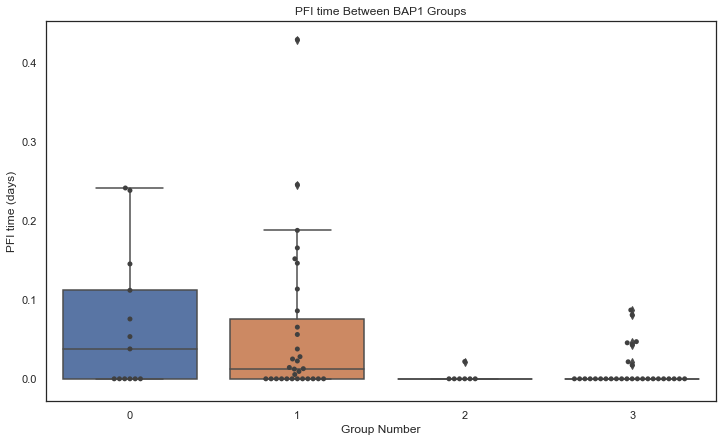

In [1225]:
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[0],"CD8 T cells"])
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[1],"CD8 T cells"])
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[2],"CD8 T cells"])
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[3],"CD8 T cells"])
fix,ax = plt.subplots()
y = [immune_fractions_df.loc[bap1_cd8_grps[i],"CD8 T cells"].values for i in range(4)]
temp_df = pd.DataFrame(data=y)
sns.swarmplot( data=temp_df.T,color=".25")
sns.boxplot(data=temp_df.T)
plt.title("PFI time Between BAP1 Groups")
plt.xlabel("Group Number")
#plt.xticks([0, 1], ['Wild Type', "Mutated"])
plt.ylabel("PFI time (days)")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0, 0.5, 'PFI time (days)')

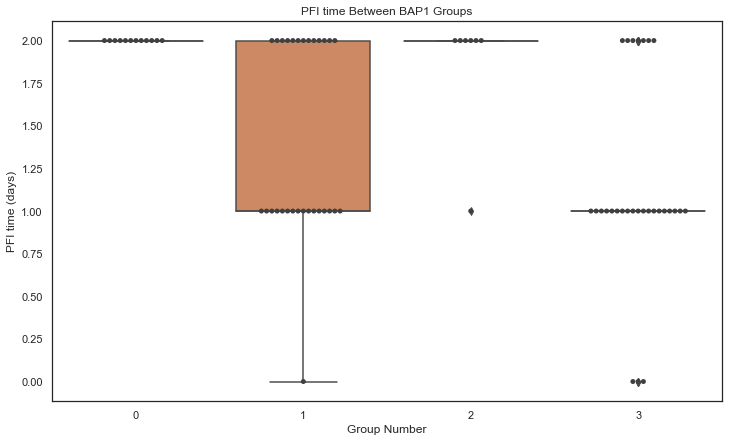

In [1224]:
y = [[patient_dict[p]['T'] for p in bap1_cd8_grps[i]] for i in range(4)]
temp_df = pd.DataFrame(data=y)
sns.swarmplot( data=temp_df.T,color=".25")
sns.boxplot(data=temp_df.T)
plt.title("PFI time Between BAP1 Groups")
plt.xlabel("Group Number")
#plt.xticks([0, 1], ['Wild Type', "Mutated"])
plt.ylabel("PFI time (days)")

In [1198]:
print_significant_phenotype_differences(bap1_cd8_grps)

BAP1_mutation  difference between groups  0   2  p-value:  8.12593368180789e-06
BAP1_mutation  difference between groups  0   3  p-value:  8.506272979418548e-11
BAP1_mutation  difference between groups  1   2  p-value:  7.032609196295468e-10
BAP1_mutation  difference between groups  1   3  p-value:  8.427114877458191e-15
os_status  difference between groups  0   2  p-value:  0.0022047271405086877
os_status  difference between groups  1   2  p-value:  0.03430457032567696
PFI_time  difference between groups  0   2  p-value:  0.03418303159597035
PFI_time  difference between groups  1   2  p-value:  0.021000592070140545
PFI_time  difference between groups  1   3  p-value:  0.023312338373336464
tumor_diameter  difference between groups  0   3  p-value:  0.005168400965549546
tumor_thickness  difference between groups  0   1  p-value:  1.109759418445187e-07
tumor_thickness  difference between groups  0   3  p-value:  1.425034491384924e-07
tumor_thickness  difference between groups  1   2  p-v

In [1201]:
print_significant_phenotype_differences([[p for p in list(patient_dict.keys()) if patient_dict[p]['os_status'] == i] for i in [0,1]])

os_status  difference between groups  0   1  p-value:  3.312480150904757e-19
tumor_diameter  difference between groups  0   1  p-value:  0.027623717705030137
tumor_thickness  difference between groups  0   1  p-value:  0.03613983398023603
T  difference between groups  0   1  p-value:  0.0009811369142748603


### Other important mutations

In [944]:
f = []
for gene in presence_df.columns:
    f.append((gene, sum([1 for i in presence_df.loc[:,gene].values if i != 0])))
    
f = sorted(f, key= lambda g:g[1], reverse=True)

In [948]:
print(f[300:350])

[('ODF1', 60), ('KLF10', 60), ('AZIN1', 60), ('ATP6V1C1', 60), ('C8orf56', 60), ('BAALC', 60), ('MIR3151', 60), ('FZD6', 60), ('CTHRC1', 60), ('SLC25A32', 60), ('DCAF13', 60), ('RIMS2', 60), ('snoU13|ENSG00000238687.1', 60), ('DPYS', 60), ('DCSTAMP', 60), ('MIR548A3', 60), ('LRP12', 60), ('ZFPM2', 60), ('OXR1', 60), ('ABRA', 60), ('ANGPT1', 60), ('RNA5SP275', 60), ('RSPO2', 60), ('EIF3E', 60), ('EMC2', 60), ('TMEM74', 60), ('TRHR', 60), ('NUDCD1', 60), ('ENY2', 60), ('PKHD1L1', 60), ('EBAG9', 60), ('SYBU', 60), ('SNORD112|ENSG00000252559.1', 60), ('KCNV1', 60), ('CSMD3', 60), ('snoU13|ENSG00000238656.1', 60), ('MIR2053', 60), ('LINC00534', 59), ('RNA5SP273', 59), ('TMEM64', 59), ('NECAB1', 59), ('TMEM55A', 59), ('OTUD6B', 59), ('LRRC69', 59), ('RN7SL777P', 59), ('MIR4661', 59), ('SLC26A7', 59), ('snoU13|ENSG00000239134.1', 59), ('RN7SKP231', 59), ('RUNX1T1', 59)]


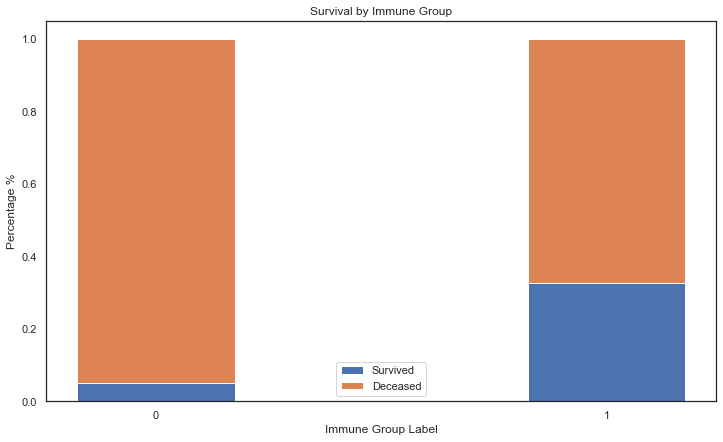

0 1 (-2.4185477483032645, 0.015582600305939135)


In [947]:
rnd_grps = [[p for p in list(presence_df.index) if presence_df.loc[p,"GEM"] == i] for i in list(Counter(presence_df.loc[bap1_grouped_ids[1],'SF3B1']).keys())]
N = len(rnd_grps)
living_group= [sum([1 for p in rnd_grps[i] if patient_dict[p]['os_status'] == 1])/len(rnd_grps[i]) for  i in range(N)]
dead_group = [sum([1 for p in rnd_grps[i] if patient_dict[p]['os_status'] == 0])/len(rnd_grps[i]) for  i in range(N)]
v = [living_group,dead_group]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('Immune Group Label')
plt.title('Survival by Immune Group')

plt.xticks(ind, ('0', '1','2'))
plt.legend(loc='best')
plt.show()

for c in combinations(range(N),2):
    print(c[0],c[1],proportions_ztest([sum([1 for p in rnd_grps[c[0]] if patient_dict[p]['os_status'] == 1]),sum([1 for p in rnd_grps[c[1]] if patient_dict[p]['os_status'] == 1])],[len(rnd_grps[c[0]]),len(rnd_grps[c[1]])]))

### Find Genes whos mutations have a high correlation with M

In [956]:
notnan = [p for p in list(patient_dict.keys()) if not np.isnan(patient_dict[p]['M'])]
x = [patient_dict[p]['M'] for p in notnan]
l = []
for g in presence_df.columns:
    r,p = stats.pearsonr(x,[0 if i == 0 else 1 for i in presence_df.loc[notnan,g].values])
    if p < .05:
        l.append((g,r,p))


[('RN7SL198P', 0.2234029346490337, 0.04637314409070269), ('TENM2', 0.23373997182810738, 0.03691248506136559), ('LARP4B', 0.29539825805631303, 0.007809782761391322), ('GTPBP4', 0.29539825805631303, 0.007809782761391322), ('ADARB2', 0.29539825805631303, 0.007809782761391322), ('IDI1', 0.29539825805631303, 0.007809782761391322), ('IDI2', 0.29539825805631303, 0.007809782761391322), ('LINC00200', 0.29539825805631303, 0.007809782761391322), ('WDR37', 0.29539825805631303, 0.007809782761391322), ('LINC00700', 0.29539825805631303, 0.007809782761391322), ('LINC00701', 0.29539825805631303, 0.007809782761391322), ('PFKP', 0.29539825805631303, 0.007809782761391322), ('PITRM1', 0.29539825805631303, 0.007809782761391322), ('KLF6', 0.29539825805631303, 0.007809782761391322), ('LINC00702', 0.29539825805631303, 0.007809782761391322), ('LINC00703', 0.29539825805631303, 0.007809782761391322), ('LINC00704', 0.29539825805631303, 0.007809782761391322), ('LINC00705', 0.29539825805631303, 0.007809782761391322)

### Try To Predict The Tumor Thickness

In [1189]:
include = [p for p in list(immune_fractions_df.index) if not np.isnan(patient_dict[p]['tumor_thickness'])]
X= immune_fractions_df.loc[include,:].values
y= [patient_dict[p]['tumor_thickness'] for p in include]
pca = PCA(n_components=9).fit(X)
print(sum(pca.explained_variance_ratio_))
transformed = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

0.9984523068747214


In [1190]:
#parameters = {'C':[1,10,100],'kernel':['rbf','linear'],'epsilon':[.1,.01,.5],'gamma':['auto','scale']} # SVR
parameters = {'n_estimators':[50,100,200], 'min_samples_split':[2,4,8],'max_features':[2,3,4,5]}
#parameters = {'loss':['huber'],'learning_rate':[.01,.05,.001],'n_estimators':[50,100],"max_depth":[1,2,3],"max_features":['auto','sqrt','log2']}
grid = GridSearchCV(RandomForestRegressor(),parameters, cv=10,iid=False)
grid.fit(X_train,y_train,sample_weight=[i**2 for i in y_train])
thickness_pred = grid.predict(X_test)

In [1191]:
print(grid.best_params_,grid.best_estimator_.feature_importances_)

{'max_features': 4, 'min_samples_split': 2, 'n_estimators': 100} [0.13214204 0.03074589 0.00800874 0.08424206 0.07595975 0.03907489
 0.08826243 0.12153048 0.10678046 0.12205918 0.10739383 0.08380025]


In [1194]:
immune_fractions_df.columns

Index(['Plasma cells', 'CD8 T cells', 'T cells gamma delta', 'Monocytes',
       'Eosinophils', 'Neutrophils', 'B cells', 'CD4 T cells', 'NK cells',
       'Macrophages', 'Mast cells', 'DC'],
      dtype='object', name='Patient_ID')

-0.06871882338843083
MSE: 7.26475201833333 MAE: 2.2576


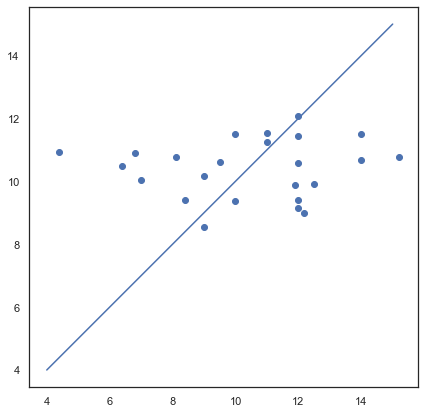

In [1192]:
x = np.linspace(4, 15, 10)
plt.plot(x,x)
plt.scatter(y_test,thickness_pred)
plt.gca().set_aspect('equal', adjustable='box')
print(grid.score(X_test,y_test))
print("MSE:",mean_squared_error(thickness_pred,y_test),"MAE:",median_absolute_error(thickness_pred,y_test))

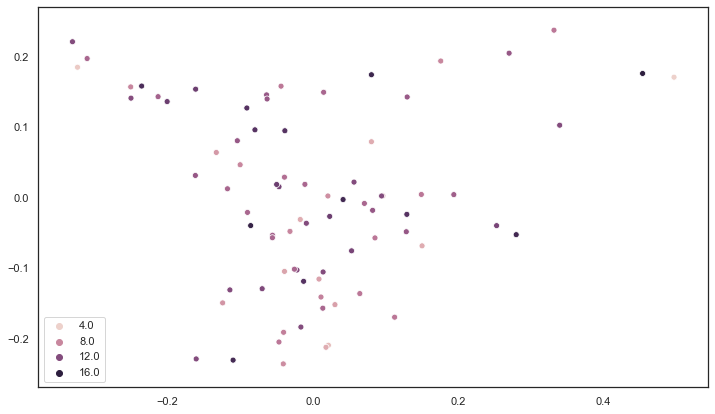

In [1051]:
sns.scatterplot(transformed[:,0],transformed[:,1],hue = [patient_dict[p]['tumor_thickness'] for p in include])

In [1099]:
for g in immune_fractions_df.columns:
    print(g, stats.pearsonr(gene_expression.loc[:,"BAP1"],immune_fractions_df.loc[gene_expression.index,g]))

Plasma cells (-0.09581393433016311, 0.3978620663201174)
CD8 T cells (-0.1389878418673482, 0.21886276903771248)
T cells gamma delta (-0.020607866002804842, 0.8560217254155779)
Monocytes (0.06560303291670812, 0.563156223592644)
Eosinophils (0.081363552225138, 0.47308103202238555)
Neutrophils (-0.17432914255353527, 0.12196562053548056)
B cells (-0.11785818920641944, 0.2977832280502603)
CD4 T cells (0.2176012567265253, 0.052506761231489854)
NK cells (0.09583419615006625, 0.39776182715814995)
Macrophages (-0.1395713601539925, 0.21691578686122437)
Mast cells (0.02573331104465159, 0.8207497523894737)
DC (0.173483904868169, 0.12381386126692992)


### What gene expressions are best at classifying BAP1 mutation

In [1116]:
stuff = []
for i in range(40):
    X = gene_expression
    y = presence_df.loc[gene_expression.index,"BAP1"]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)
    estimator = DecisionTreeClassifier()
    estimator.fit(X_train,y_train)
    stuff.extend([j for j in list(X.columns[[i for i in estimator.tree_.feature if i != -2]]) if j not in stuff])
print(stuff)

['MPDU1', 'ASMT', 'EPHA4', 'CHAC1', 'SSTR4', 'SLC38A11', 'DZIP3', 'LOC100125556', 'HTR2B', 'TFCP2L1', 'LOC728819', 'SH3BGRL3', 'EFTUD2', 'OLIG1', 'FAAH2', 'ZBTB43', 'MAPK12', 'ANG', 'CSN2', 'TRIM67', 'LOC100126784', 'CCDC24', 'INPP5F', 'ALG3', 'MRFAP1', 'NQO1', 'TMEM25', 'PRRG3', 'LTBR', 'GFRA3', 'TNNI3', 'DLL4', 'NTSR1', 'HOXC5']


In [1228]:
list(most_variant.columns)

['C19orf28',
 'DDX17',
 'GPR143',
 'GNAT1',
 'TRAM1',
 'GANAB',
 'RPSAP58',
 'EIF3A',
 'RPL24',
 'CYC1',
 'ATP5G2',
 'EEF1A2',
 'TTYH3',
 'PYGB',
 'ATP2A2',
 'FAM53B',
 'TSPAN10',
 'EIF4G2',
 'YBX1',
 'COL18A1',
 'MXRA7',
 'GSN',
 'GAS5',
 'COX4I1',
 'YWHAE',
 'MSN',
 'RPS7',
 'TMED10',
 'TUBB4',
 'PGK1',
 'RPL38',
 'TMSL3',
 'METTL9',
 'EIF3H',
 'EEF1A1P9',
 'HSPB1',
 'ARF1',
 'GPAA1',
 'CYGB',
 'RASGRP3',
 'FKBP10',
 'PPIB',
 'TPP1',
 'STAT1',
 'SRRM2',
 'HNRNPK',
 'ST3GAL1',
 'EFHD1',
 'CRYAB',
 'GPI',
 'TTR',
 'DDX5',
 'SPTAN1',
 'MYO1D',
 'RPL17',
 'C20orf108',
 'EIF3L',
 'RPS13',
 'PFN1',
 'CLTC',
 'PRAME',
 'BTF3',
 'HSP90B1',
 'HLA-H',
 'RPL35A',
 'TRAK2',
 'HNRNPA2B1',
 'MITF',
 'RPL22',
 'TUBA1B',
 'PCDHGC3',
 'GNS',
 'TFAP2A',
 'STOM',
 'S100A6',
 'GRN',
 'CAPZA1',
 'ENO2',
 'SOX10',
 'TAP1',
 'ARHGDIA',
 'SLC25A3',
 'NCOR2',
 'MMP14',
 'RPS27A',
 'TNFRSF14',
 'PTMA',
 'MYO5A',
 'IGFBP7',
 'MFGE8',
 'C4A',
 'ACTN4',
 'TMBIM6',
 'TMSB10',
 'DYNC1H1',
 'AHNAK2',
 'UBA52',
 'ED

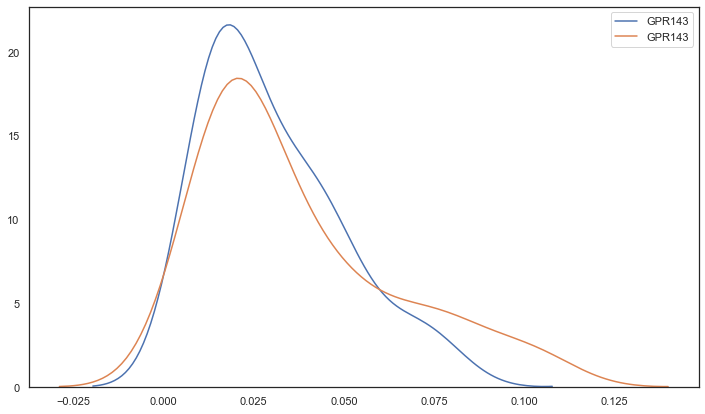

In [1229]:
sns.kdeplot(gene_expression.loc[gender_grouped_ids[0],"GPR143"])
sns.kdeplot(gene_expression.loc[gender_grouped_ids[1],"GPR143"])

In [1231]:
mannwhitneyu(gene_expression.loc[gender_grouped_ids[0],"GPR143"],gene_expression.loc[gender_grouped_ids[1],"GPR143"])

MannwhitneyuResult(statistic=694.0, pvalue=0.18353712472551253)